<a href="https://colab.research.google.com/github/EmePin/Analisis-de-datos/blob/main/Analisis_PLANEA_MS_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
import pandas as pd  # Manejo y análisis de datos tabulares (DataFrames)
import os  # Interacción con el sistema operativo (archivos, directorios)
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones básicas
import seaborn as sns  # Visualizaciones estadísticas avanzadas y estilizadas
import numpy as np

# Recolección de datos

In [210]:

from google.colab import files
from google.colab import drive
# Montar Google Drive (si los archivos están ahí)
drive.mount('/content/drive')

# Ruta de la carpeta en Google Drive donde están los archivos Excel
folder_path = "/content/drive/MyDrive/COLAB DB/PLANEA_2017"
output_file = "/content/drive/MyDrive/COLAB DB/base_datos_unida.xlsx"

# Obtener lista de archivos Excel en la carpeta
files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx")]

# Lista para almacenar los DataFrames
dataframes = []

# Leer y unir todos los archivos
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
df_combined = pd.concat(dataframes, ignore_index=True)

# Guardar en un nuevo archivo Excel
df_combined.to_excel(output_file, index=False)

print(f"Archivo combinado guardado como {output_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo combinado guardado como /content/drive/MyDrive/COLAB DB/base_datos_unida.xlsx


# Set de datos

In [211]:
df = pd.read_excel("/content/drive/MyDrive/COLAB DB/base_datos_unida.xlsx")


In [212]:
print(df.shape)
df.head()

(16380, 52)


CLAVE DE LA ENTIDAD   ENTIDAD CLAVE DE LA ESCUELA  \
0                   12  GUERRERO          12UBH0005D   
1                   12  GUERRERO          12UBH0005D   
2                   12  GUERRERO          12UBH0006C   
3                   12  GUERRERO          12UBH0006C   
4                   12  GUERRERO          12UBH0013M   

                   NOMBRE DE LA ESCUELA       TURNO EXTENSION  \
0  UNIDAD ACADEMICA: PREPARATORIA NO. 1    MATUTINO       NaN   
1  UNIDAD ACADEMICA: PREPARATORIA NO. 1  VESPERTINO       NaN   
2  UNIDAD ACADEMICA: PREPARATORIA NO. 7    MATUTINO       NaN   
3  UNIDAD ACADEMICA: PREPARATORIA NO. 7  VESPERTINO       NaN   
4  UNIDAD ACADEMICA: PREPARATORIA NO. 2    MATUTINO       NaN   

        NOMBRE DEL MUNICIPIO     NOMBRE DE LA LOCALIDAD      SUBSISTEMA  \
0  CHILPANCINGO DE LOS BRAVO  CHILPANCINGO DE LOS BRAVO  BACHI AUTONOMO   
1  CHILPANCINGO DE LOS BRAVO  CHILPANCINGO DE LOS BRAVO  BACHI AUTONOMO   
2         ACAPULCO DE JUAREZ         ACAPULCO DE JUAREZ  BACHI AUTONOMO   
3         ACAPULCO DE JUAREZ         ACAPULCO DE JUAREZ  BACHI AUTONOMO   
4         ACAPULCO DE JUAREZ         ACAPULCO DE JUAREZ  BACHI AUTONOMO   

  GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT  ...  \
0                                               BAJO                ...   
1                                               BAJO                ...   
2                                               BAJO                ...   
3                                               BAJO                ...   
4                                               BAJO                ...   

  NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                               11.8       
1                                                0.0       
2                                                3.2       
3                                                0.0       
4                                                9.1       

   NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  \
0                                                2.9       
1                                                0.0       
2                                                1.6       
3                                                0.0       
4                                                0.0       

   NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ESCUELAS PARECIDAS  \
0                                               77.7                 
1                                               77.7                 
2                                               77.7                 
3                                               77.7                 
4                                               77.7                 

   NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ESCUELAS PARECIDAS  \
0                                               16.5                  
1                                               16.5                  
2                                               16.5                  
3                                               16.5                  
4                                               16.5                  

   NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ESCUELAS PARECIDAS  \
0                                                5.0                   
1                                                5.0                   
2                                                5.0                   
3                                                5.0                   
4                                                5.0                   

   NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ESCUELAS PARECIDAS  \
0                                                0.7                  
1                                                0.7                  
2                                                0.7                  
3                                                0.7                  
4              

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16380 entries, 0 to 16379
Data columns (total 52 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   CLAVE DE LA ENTIDAD                                                                                                 16380 non-null  int64  
 1   ENTIDAD                                                                                                             16380 non-null  object 
 2   CLAVE DE LA ESCUELA                                                                                                 16380 non-null  object 
 3   NOMBRE DE LA ESCUELA                                                                                                16379 non-null  object 
 4   TURNO           

# Limpieza de datos
Se realiza el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1.- Datos faltantes

2.. Columnas irrelevantes para el problema a resolver

3.- Registros (Filas) repetidos

4.- Valores extremos (outliers)

5.- Errores tipográficos

Datos faltantes

Alternativas:

- Eliminar
- Interpolar
- modelos de ML para completar

Mi solución: Eliminar la columna Extensión porque tiene muchas filas vacías y es irrelevante

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16380 entries, 0 to 16379
Data columns (total 52 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   CLAVE DE LA ENTIDAD                                                                                                 16380 non-null  int64  
 1   ENTIDAD                                                                                                             16380 non-null  object 
 2   CLAVE DE LA ESCUELA                                                                                                 16380 non-null  object 
 3   NOMBRE DE LA ESCUELA                                                                                                16379 non-null  object 
 4   TURNO           

In [215]:
# prompt: elimina de df la columna extensión

if 'EXTENSION' in df.columns:
  df = df.drop('EXTENSION', axis=1)


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16380 entries, 0 to 16379
Data columns (total 51 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   CLAVE DE LA ENTIDAD                                                                                                 16380 non-null  int64  
 1   ENTIDAD                                                                                                             16380 non-null  object 
 2   CLAVE DE LA ESCUELA                                                                                                 16380 non-null  object 
 3   NOMBRE DE LA ESCUELA                                                                                                16379 non-null  object 
 4   TURNO           

- Se eliminan los datos que no están completos al ver con .info() que no todas las columnas tienen la misma cantidad de registros.

In [217]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16345 entries, 0 to 16379
Data columns (total 51 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   CLAVE DE LA ENTIDAD                                                                                                 16345 non-null  int64  
 1   ENTIDAD                                                                                                             16345 non-null  object 
 2   CLAVE DE LA ESCUELA                                                                                                 16345 non-null  object 
 3   NOMBRE DE LA ESCUELA                                                                                                16345 non-null  object 
 4   TURNO                

Eliminar columnas irrelevantes

*Conocer si una columna es relevante porque contiene subniveles

In [218]:


# Función para contar subniveles en una columna
def contar_subniveles(df, columna):
  subniveles_unicos = df[columna].unique()
  return len(subniveles_unicos)

# Diccionario para almacenar la cantidad de subniveles para cada columna
cantidad_subniveles = {}

# Iterar sobre las columnas del DataFrame
for columna in df.columns:
  cantidad_subniveles[columna] = contar_subniveles(df, columna)

# Mostrar la cantidad de subniveles para cada columna
print("Cantidad de subniveles para cada columna:")
for columna, cantidad in cantidad_subniveles.items():
  print(f"{columna}: {cantidad}")


Cantidad de subniveles para cada columna:
CLAVE DE LA ENTIDAD: 32
ENTIDAD: 32
CLAVE DE LA ESCUELA: 14634
NOMBRE DE LA ESCUELA: 12674
TURNO: 4
NOMBRE DEL MUNICIPIO: 2097
NOMBRE DE LA LOCALIDAD: 7288
SUBSISTEMA: 21
GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT: 5
SOSTENIMIENTO: 4
TOTAL DE ALUMNOS EN EL ULTIMO GRADO MATRICULA: 566
ALUMNOS  PROGRAMADOS: 42
ALUMNOS EVALUADOS LENGUAJE Y COMUNICACION: 80
ALUMNOS EVALUADOS MATEMATICAS: 80
PORCENTAJE DE ALUMNOS EVALUADOS LENGUAJE Y COMUNICACIÓN: 382
PORCENTAJE DE ALUMNOS EVALUADOS MATEMATICAS: 384
LOS ALUMNOS EVALUADOS SON REPRESENTATIVOS DE LA TOTALIDAD DE LOS ESTUDIANTES DE LA ESCUELA LENGUAJE Y COMUNICACION: 2
LOS ALUMNOS EVALUADOS SON REPRESENTATIVOS DE LA TOTALIDAD DE LOS ESTUDIANTES DE LA ESCUELA MATEMATICAS: 2
ESCUELAS PARECIDAS PARA COMPARACION: 116
NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I CANTIDAD DE ALUMNOS: 74
NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II CANTIDAD DE ALUMNOS: 43
NIVELES DE LOGRO EN LENGUAJE Y

In [219]:
df.describe()

CLAVE DE LA ENTIDAD  TOTAL DE ALUMNOS EN EL ULTIMO GRADO MATRICULA  \
count         16345.000000                                   16345.000000   
mean             17.486265                                      75.075130   
std               8.291699                                     104.953593   
min               1.000000                                       1.000000   
25%              11.000000                                      17.000000   
50%              16.000000                                      35.000000   
75%              24.000000                                      94.000000   
max              32.000000                                    2696.000000   

       ALUMNOS  PROGRAMADOS  ALUMNOS EVALUADOS LENGUAJE Y COMUNICACION  \
count          16345.000000                               16345.000000   
mean              39.939737                                  34.725237   
std               26.821827                                  23.845844   
min                1.000000                                   1.000000   
25%               17.000000                                  15.000000   
50%               35.000000                                  29.000000   
75%               76.000000                                  59.000000   
max               80.000000                                  80.000000   

       ALUMNOS EVALUADOS MATEMATICAS  \
count                   16345.000000   
mean                       34.389783   
std                        23.656874   
min                         1.000000   
25%                        15.000000   
50%                        29.000000   
75%                        57.000000   
max                        80.000000   

       PORCENTAJE DE ALUMNOS EVALUADOS LENGUAJE Y COMUNICACIÓN  \
count                                       16345.000000         
mean                                           87.538079         
std                                            13.880695         
min                                             1.300000         
25%                                            83.300000         
50%                                            91.300000         
75%                                            97.100000         
max                                           100.000000         

       PORCENTAJE DE ALUMNOS EVALUADOS MATEMATICAS  \
count                                 16345.000000   
mean                                     86.946265   
std                                      14.492409   
min                                       1.300000   
25%                                      82.500000   
50%                                      90.900000   
75%                                      96.900000   
max                                     103.100000   

       NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I CANTIDAD DE ALUMNOS  \
count                                       16345.000000                   
mean                                           11.856103                   
std                                            10.838922                   
min                                             0.000000                   
25%                                             4.000000                   
50%                                             9.000000                   
75%                                            17.000000                   
max                                            78.000000                   

       NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II CANTIDAD DE ALUMNOS  \
count                                       16345.000000                    
mean                                            9.722973                    
std                                             7.829441                    
min                                             0.000000                    
25%                                             4.000000                    
50%                                             7.000000

Eliminar filas repetidas

In [220]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (16345, 51)
Tamaño del set después de eliminar las filas repetidas: (16345, 51)


Detección y manejo de valores extremos

El uso de gráficos de caja (o «boxplots») es una herramienta que fácilmente permite detectar la presencia de «outliers» en variables numéricas.

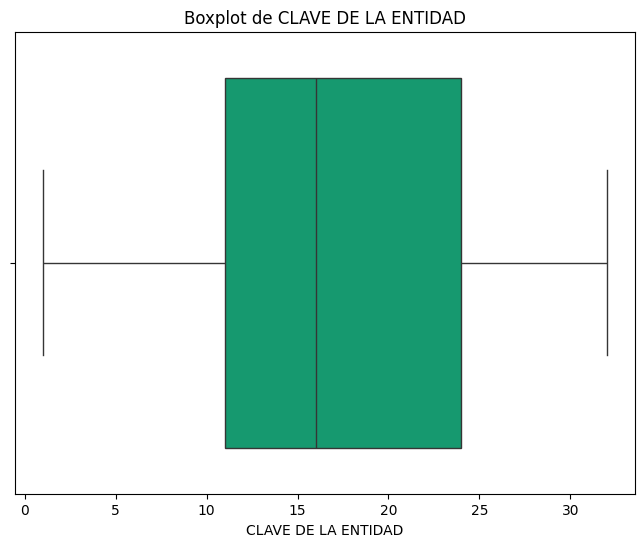

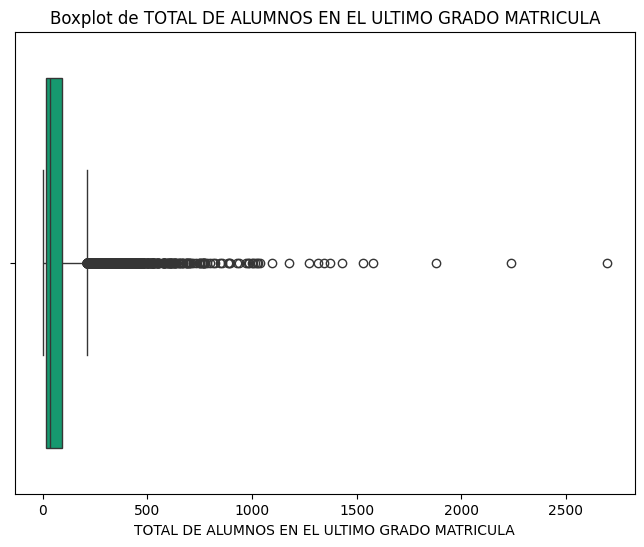

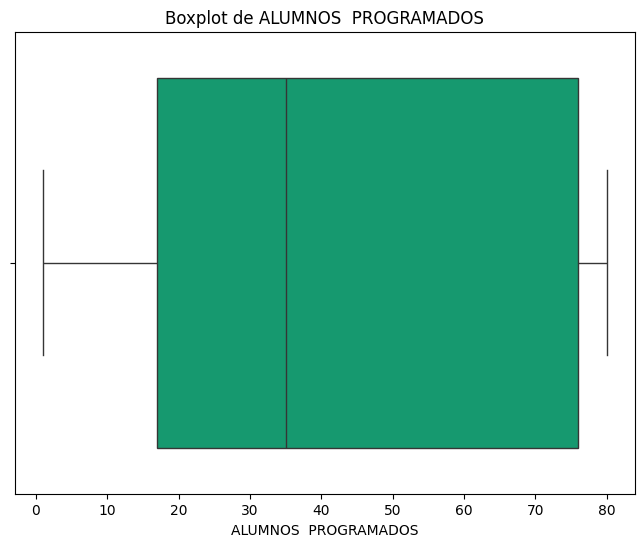

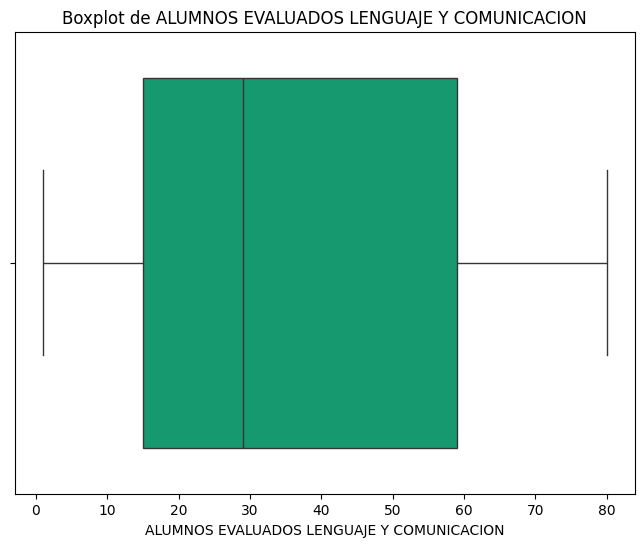

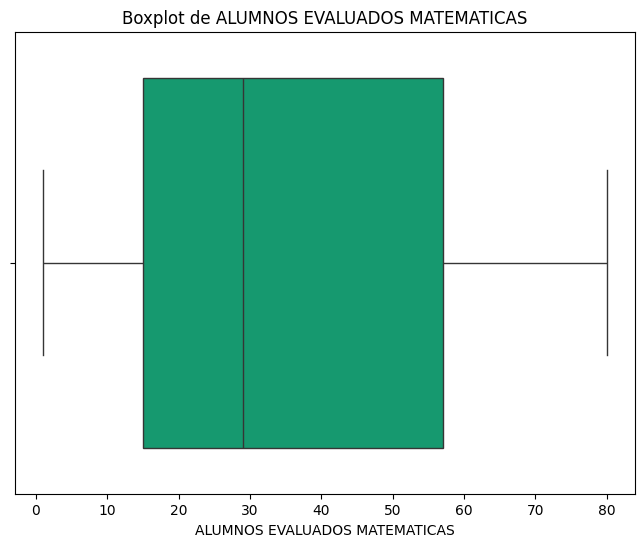

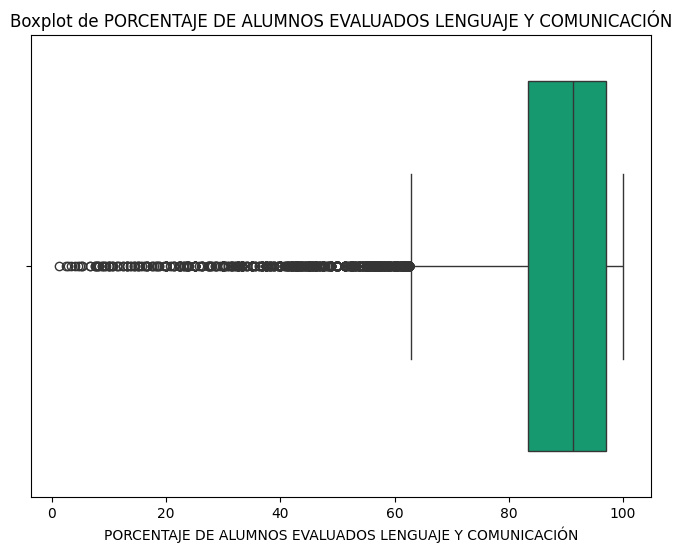

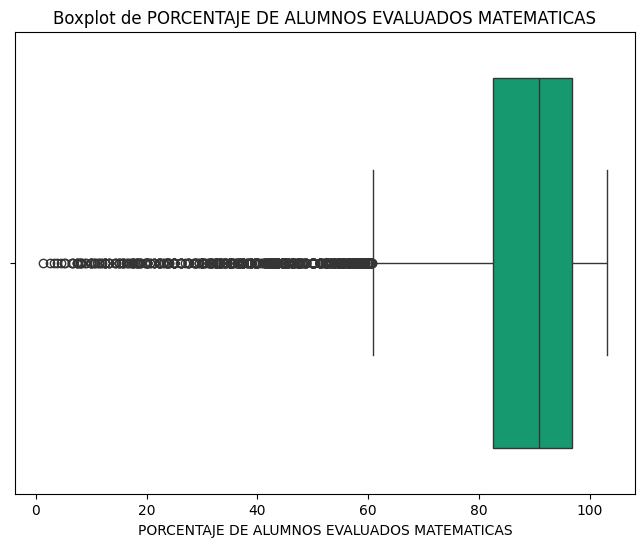

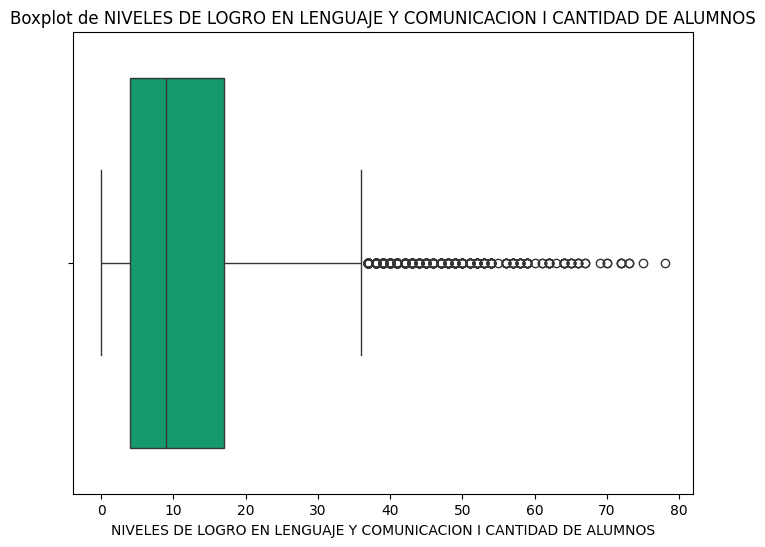

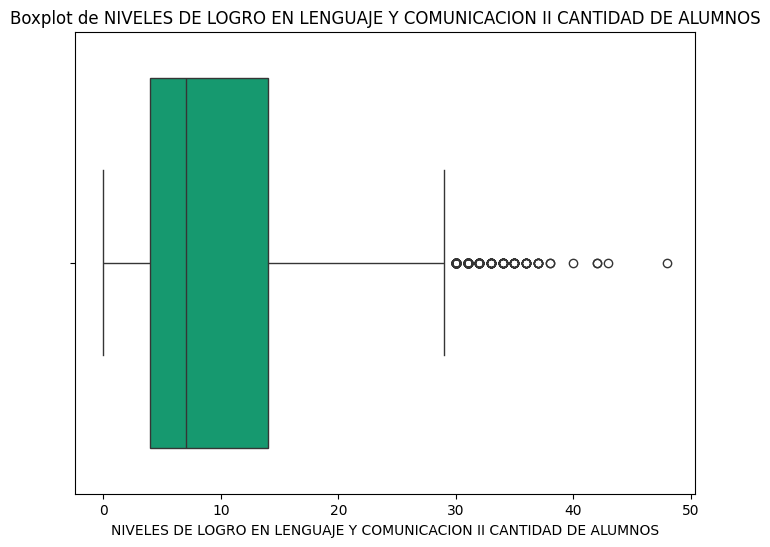

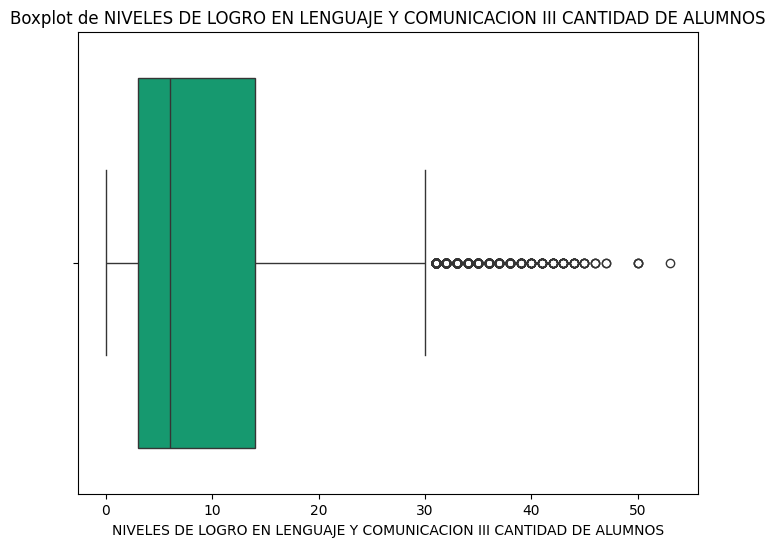

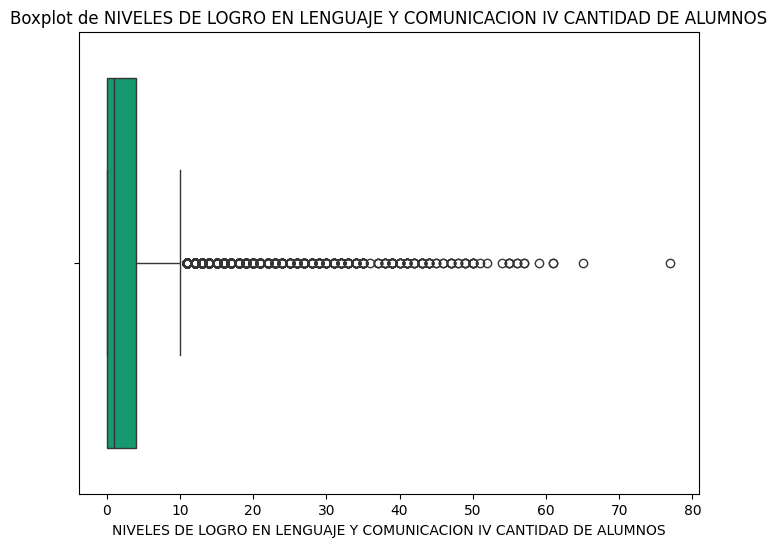

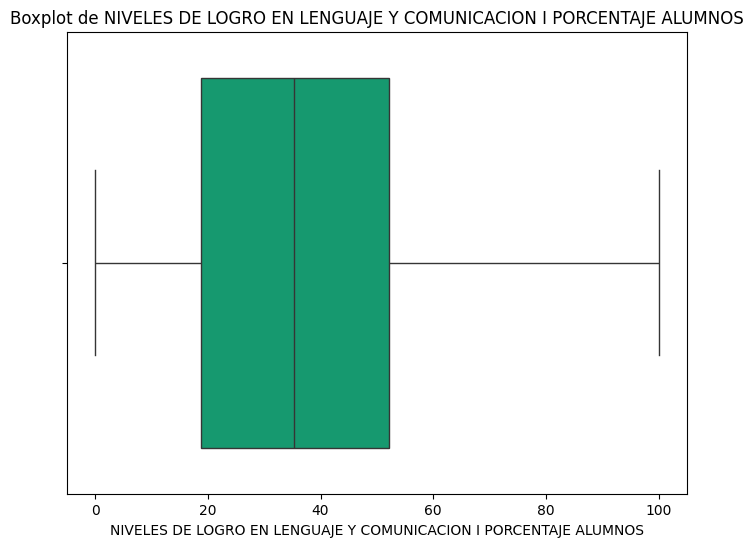

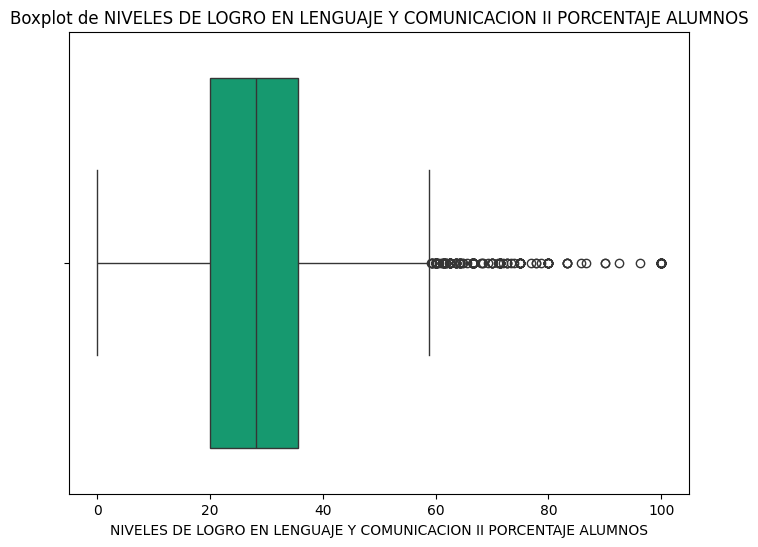

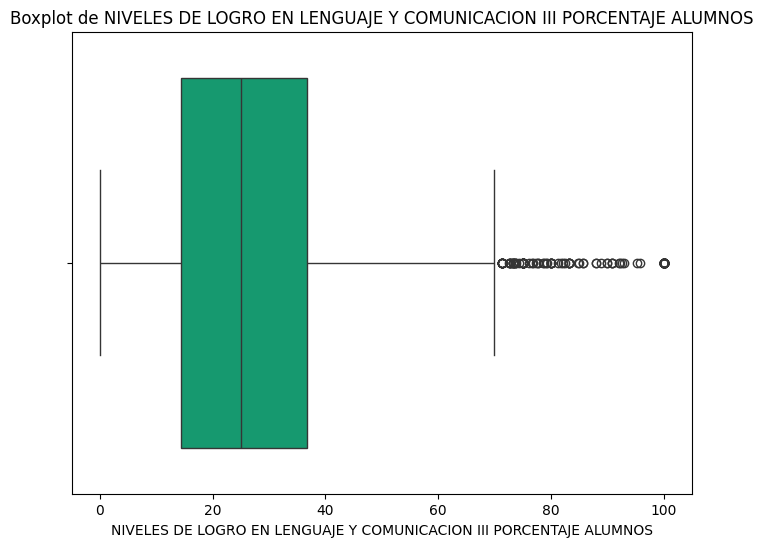

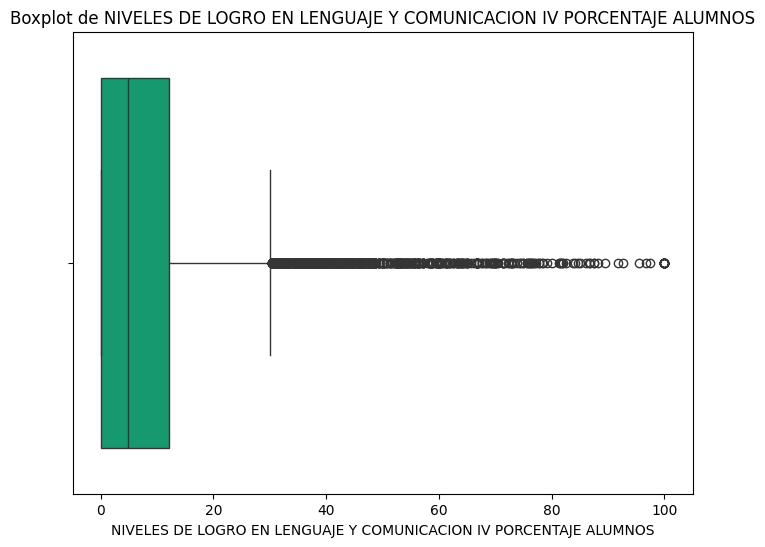

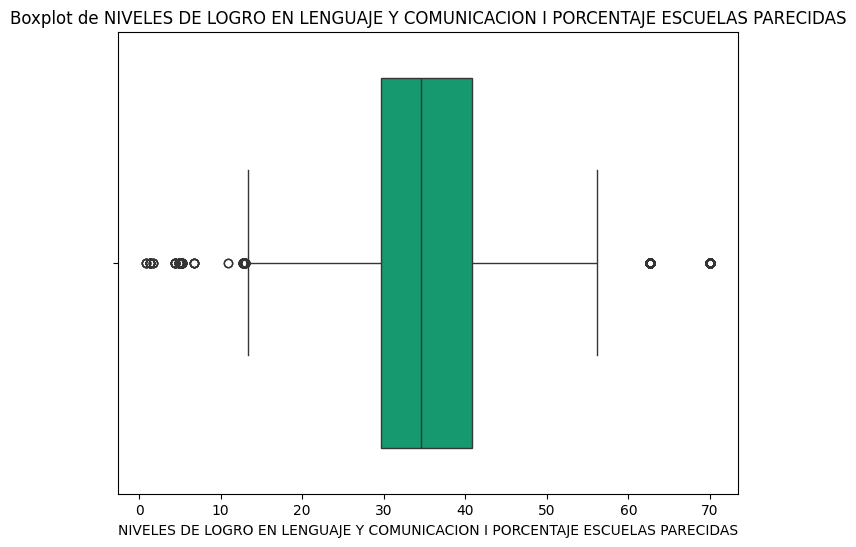

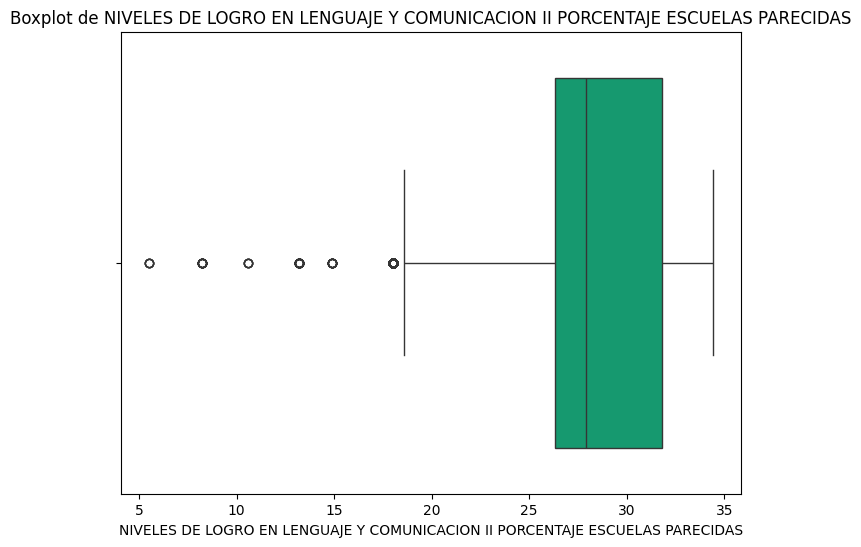

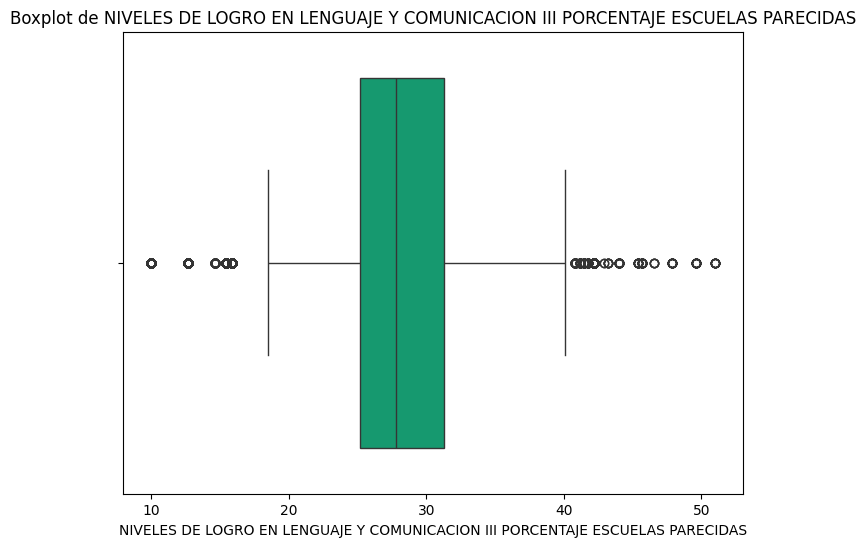

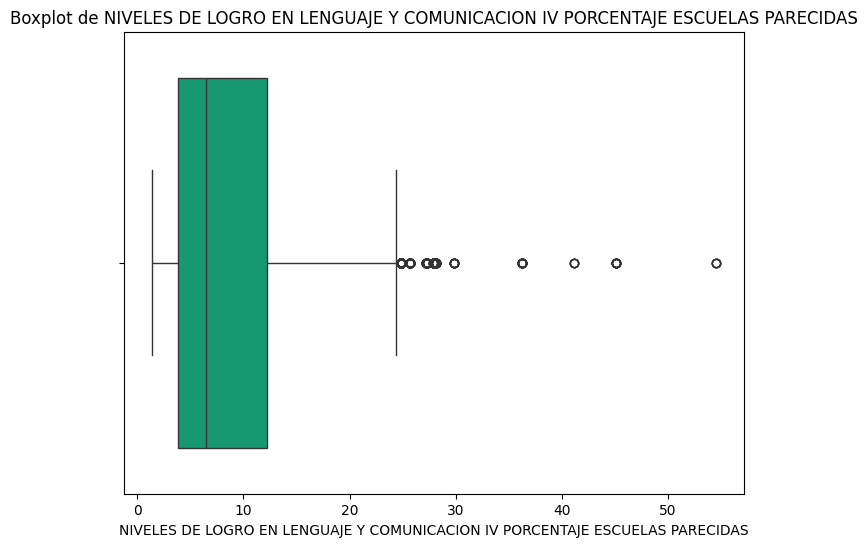

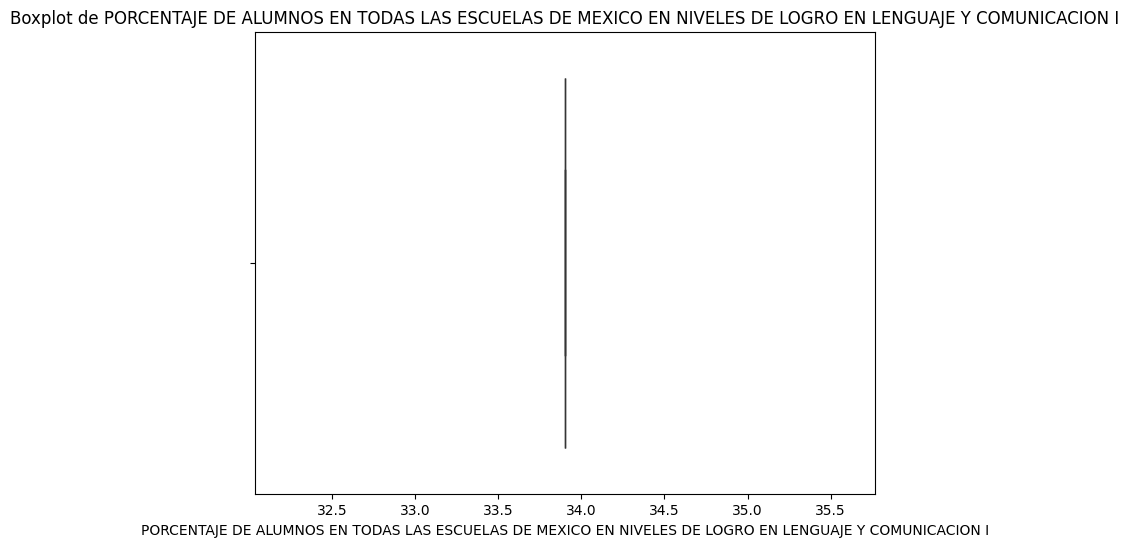

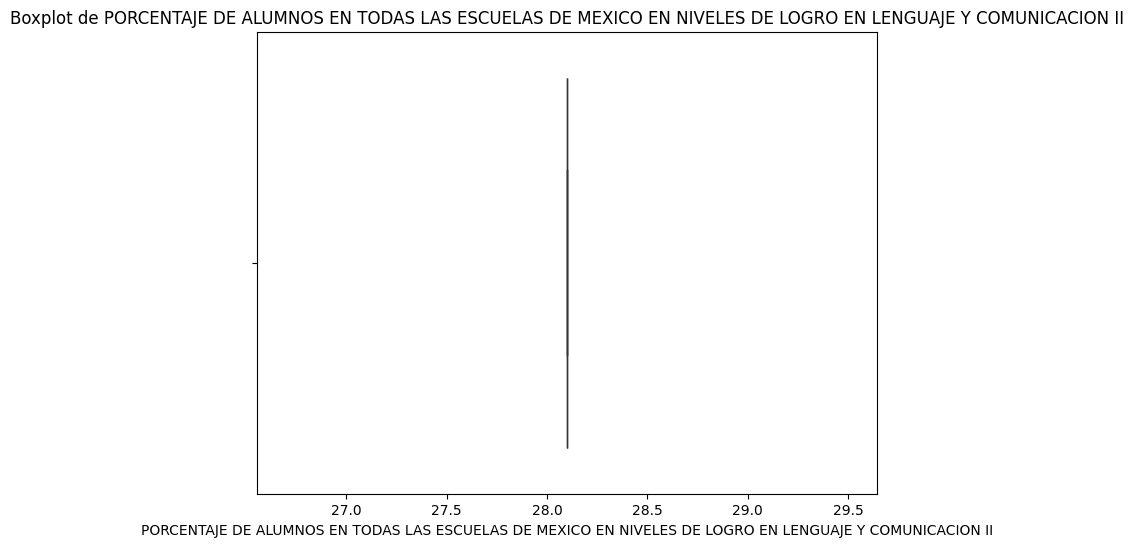

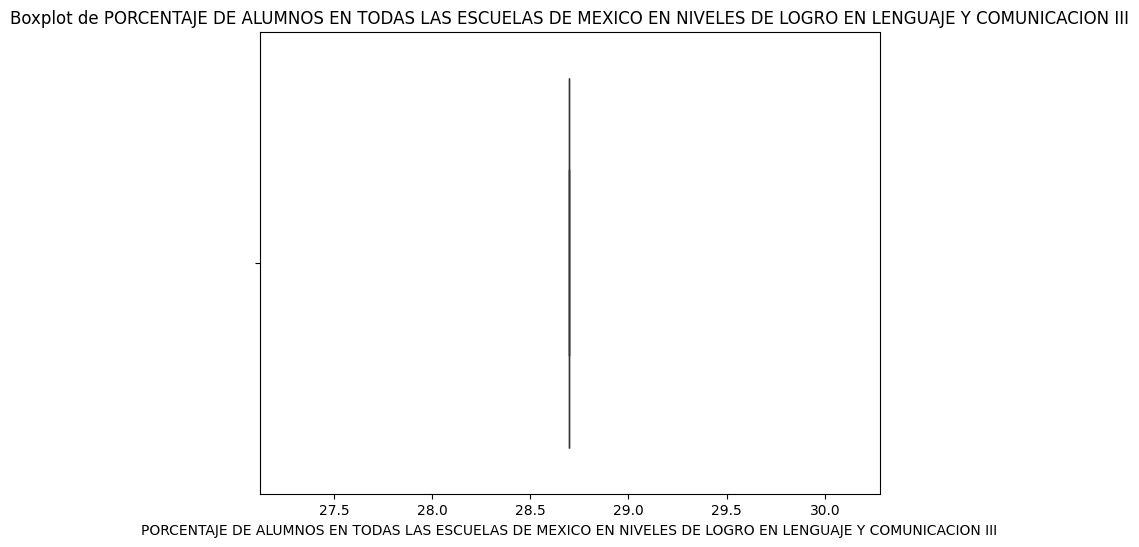

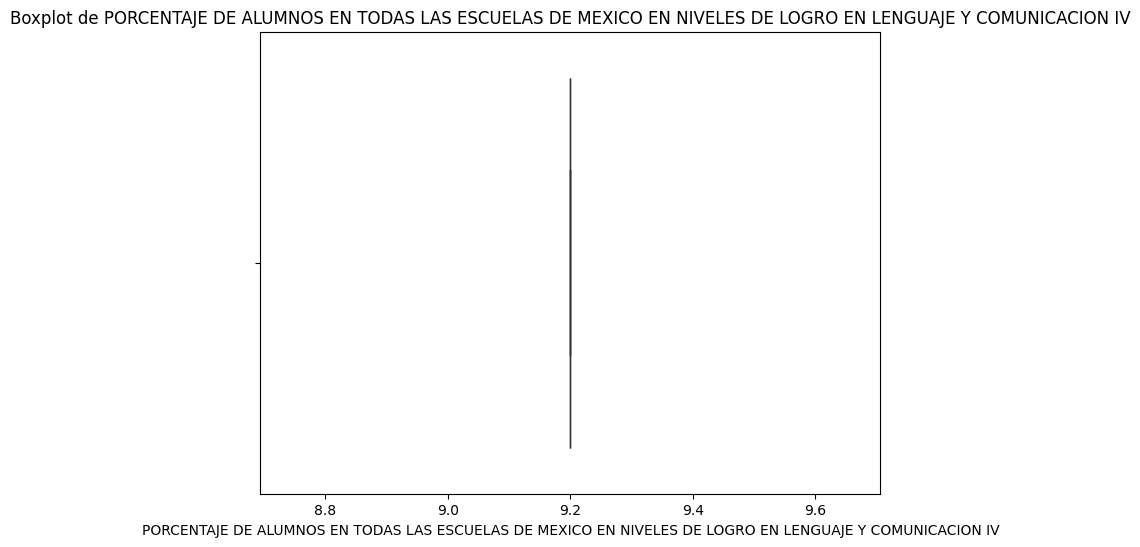

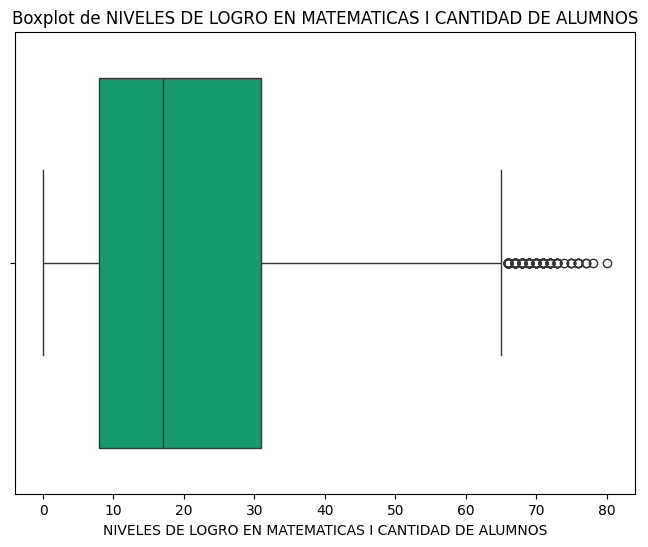

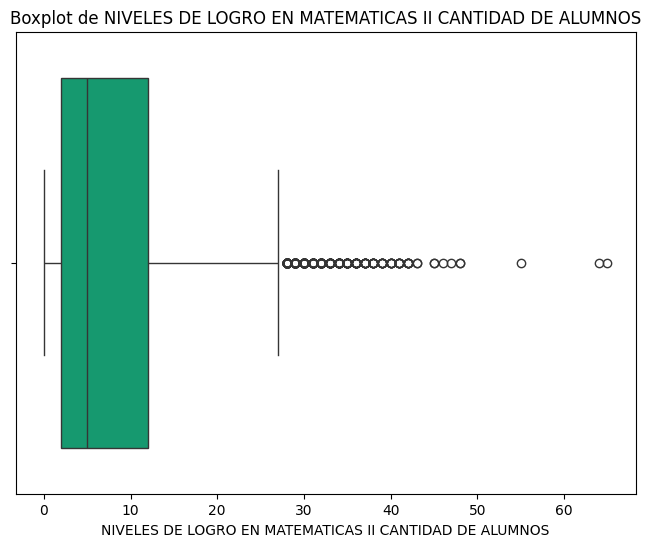

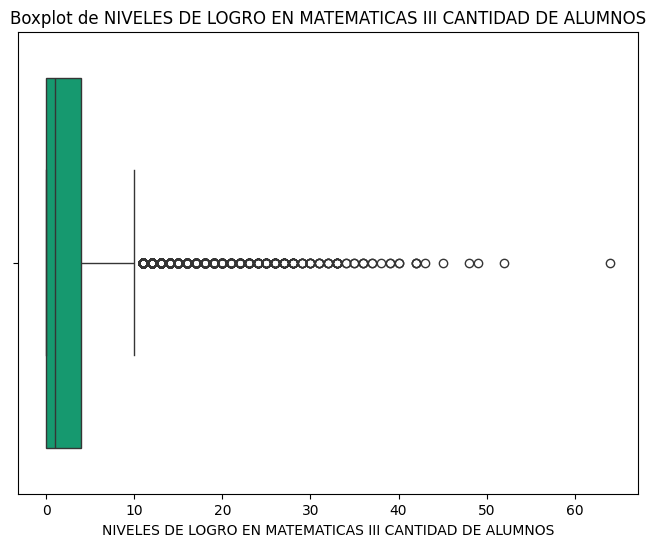

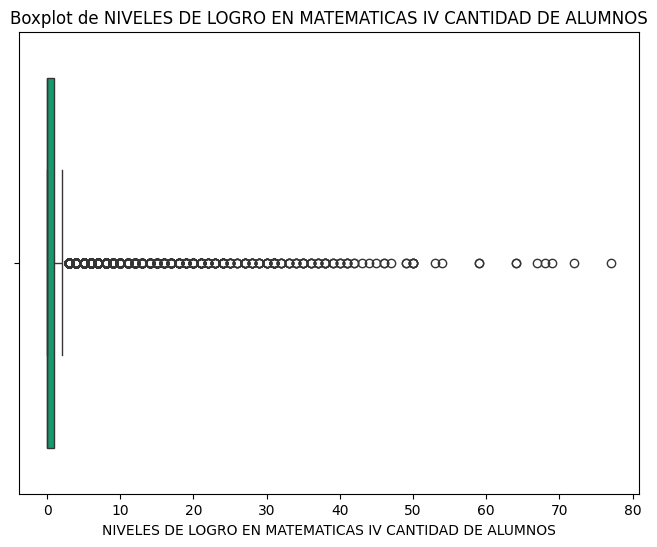

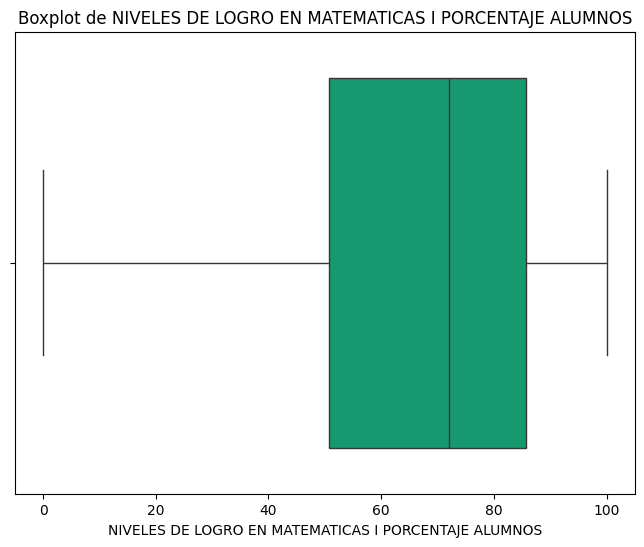

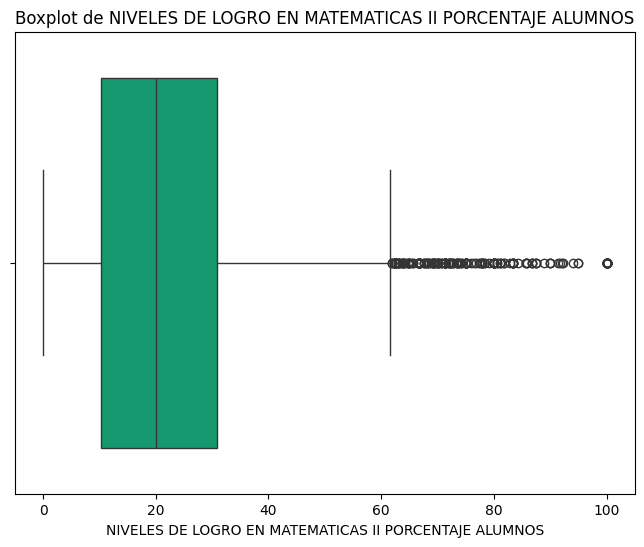

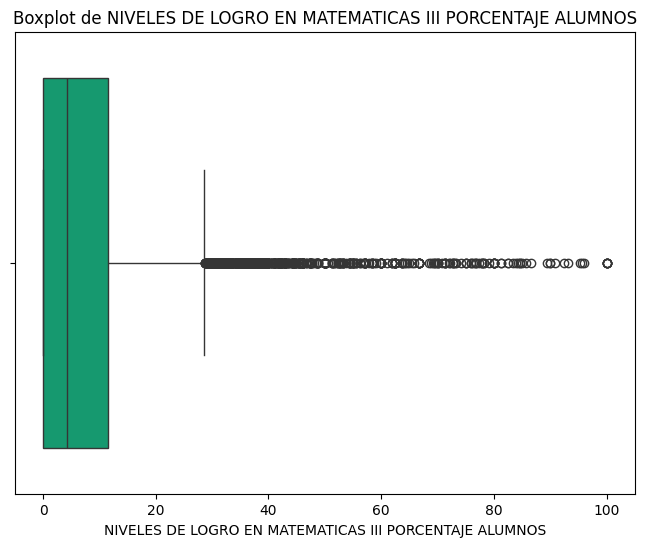

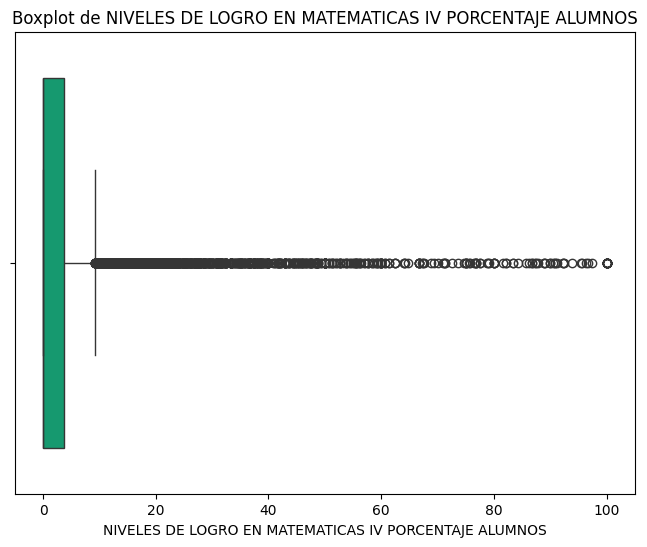

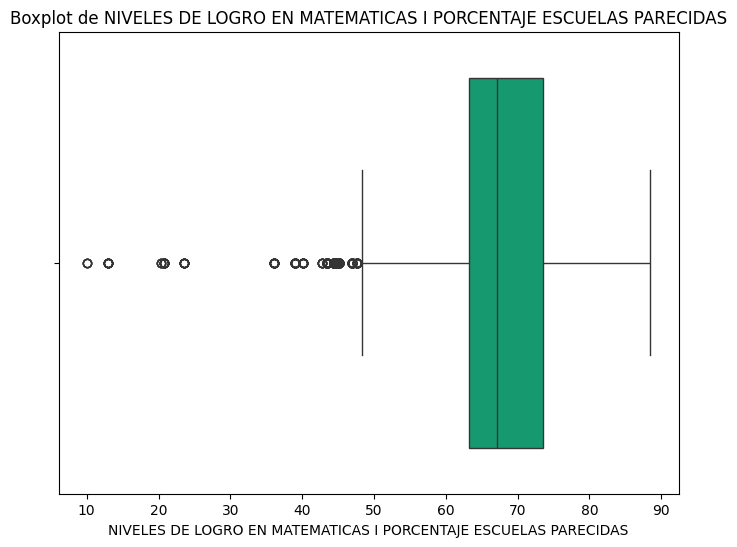

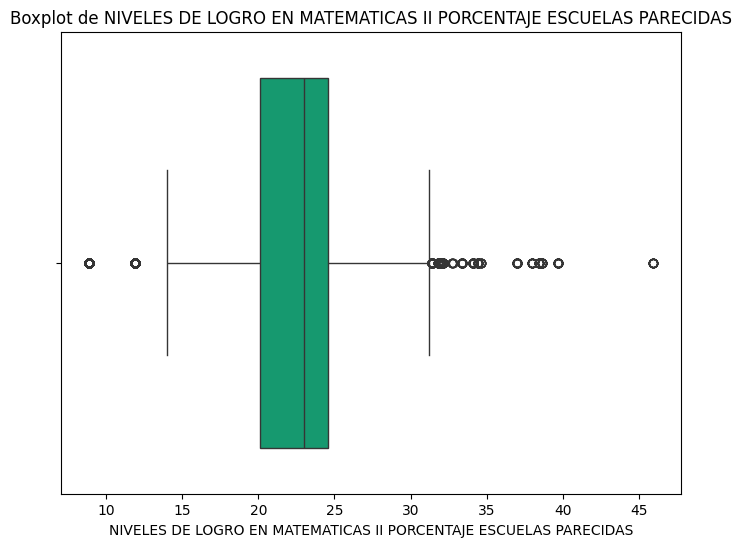

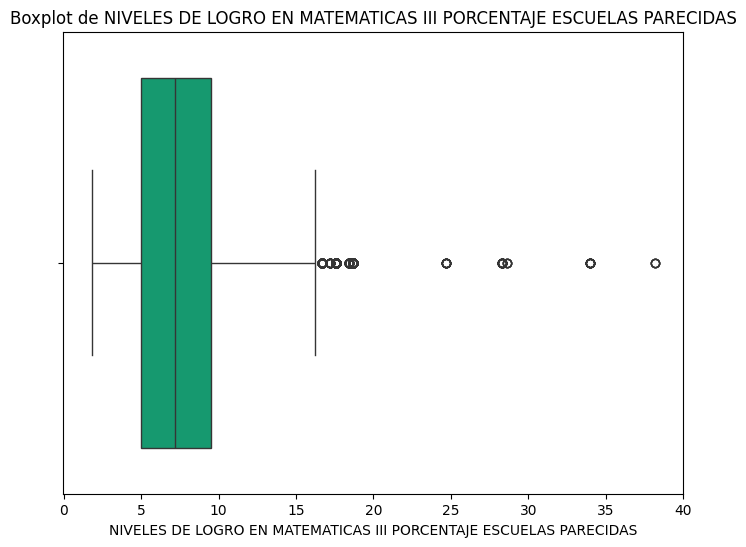

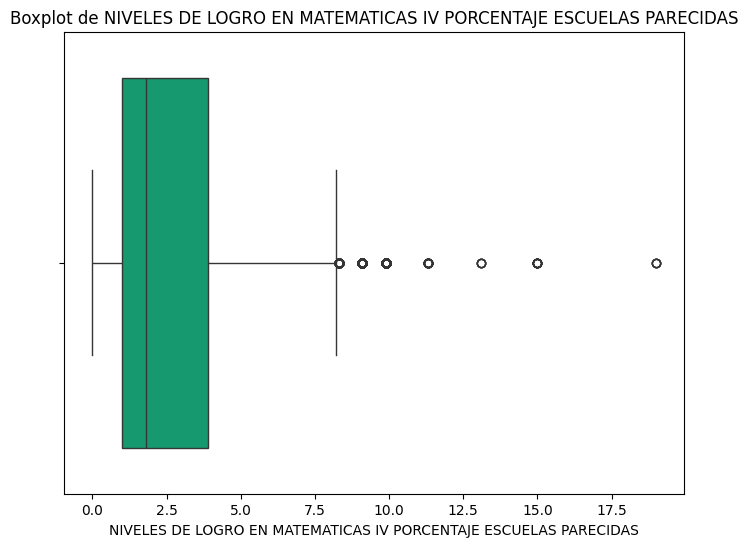

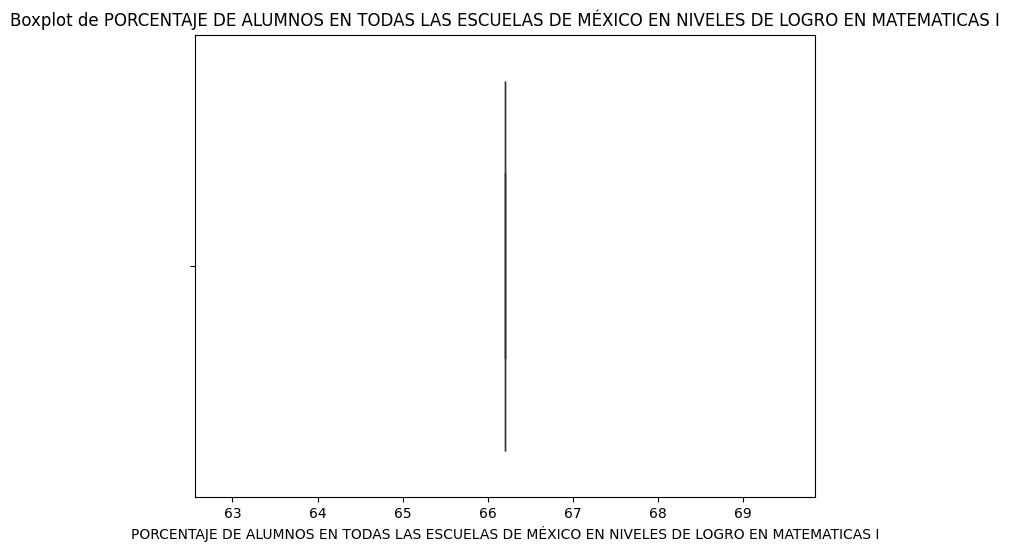

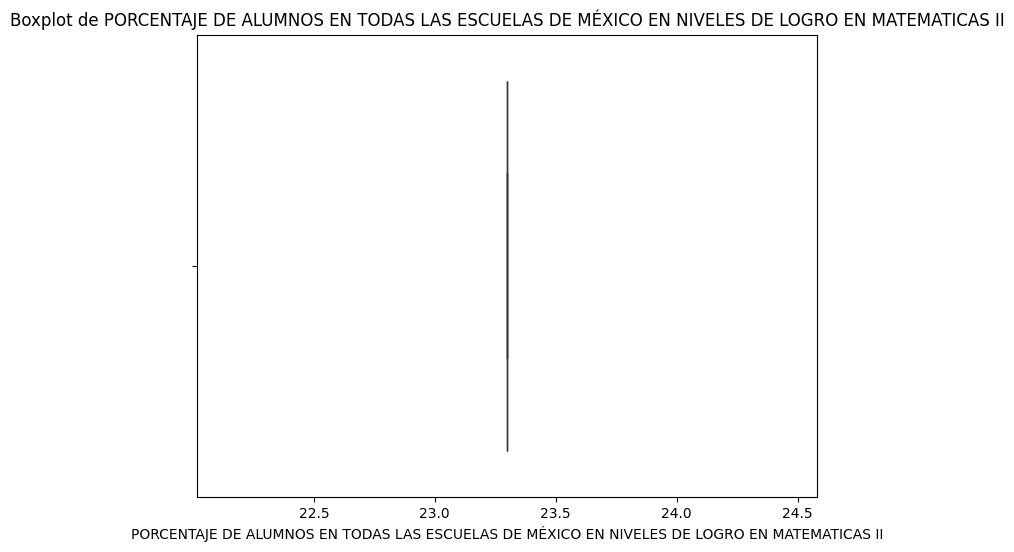

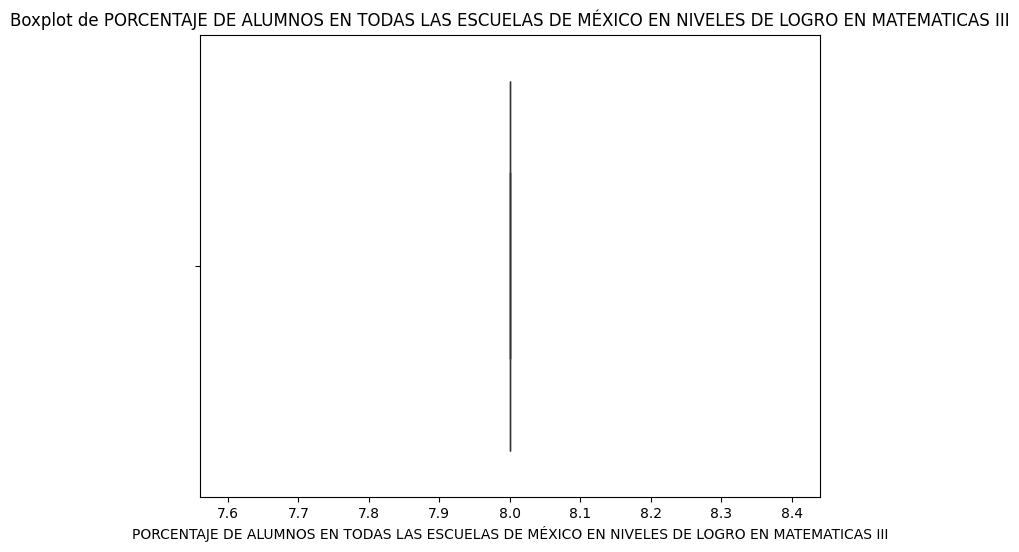

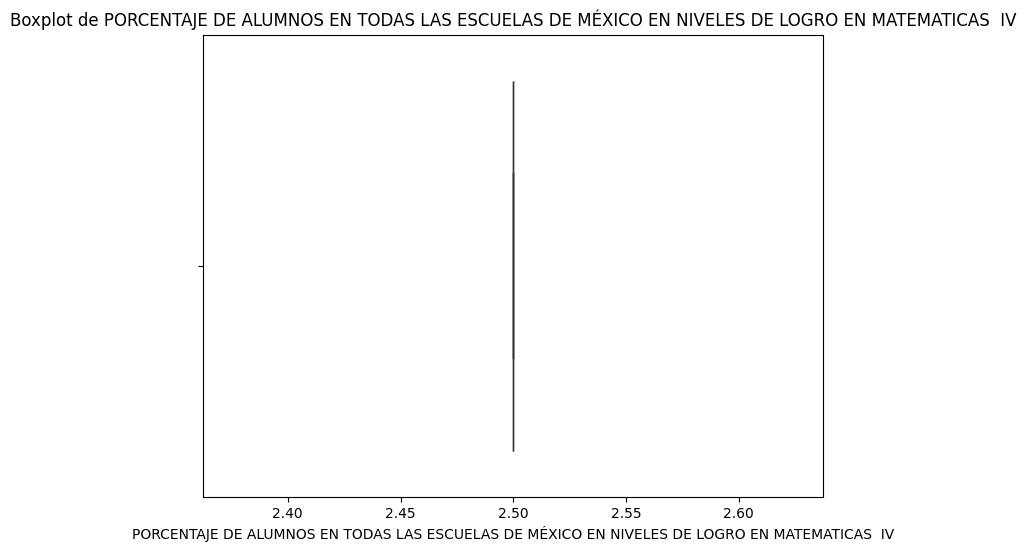

In [221]:

# Generar boxplots para cada columna numérica con color verde
for columna in df.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[columna], color='#00af77')
  plt.title(f'Boxplot de {columna}')
  plt.show()


Errores tipográficos

Los errores tipográficos pueden corresponder a sub-niveles dentro de una variable categórica que estén escritos incorrectamente. Por ejemplo, podríamos tener un nivel como «mobile» en la variable «contact» y un sub-nivel similar pero escrito incorrectamente, como por ejemplo «mobiiile».

In [222]:

# Iterar sobre las columnas del DataFrame
for columna in df.columns:
  # Imprimir el nombre de la columna
  print(f"Columna: {columna}")

  # Usar value_counts() para obtener los subniveles y sus frecuencias
  subniveles = df[columna].value_counts()

  # Imprimir los subniveles y sus frecuencias
  print(subniveles)
  print("-" * 20)  # Separador entre columnas


Columna: CLAVE DE LA ENTIDAD
CLAVE DE LA ENTIDAD
15    1783
30    1640
21    1582
11     934
14     818
7      743
20     626
12     597
16     562
13     490
5      486
8      477
24     457
25     426
9      421
28     397
19     370
2      363
31     351
27     336
26     324
10     286
32     270
22     259
17     220
1      214
23     204
29     188
18     162
4      134
6      116
3      109
Name: count, dtype: int64
--------------------
Columna: ENTIDAD
ENTIDAD
MEXICO                 1783
VERACRUZ               1640
PUEBLA                 1582
GUANAJUATO              934
JALISCO                 818
CHIAPAS                 743
OAXACA                  626
GUERRERO                597
MICHOACAN               562
HIDALGO                 490
COAHUILA                486
CHIHUAHUA               477
SAN LUIS POTOSI         457
SINALOA                 426
CIUDAD DE MEXICO        421
TAMAULIPAS              397
NUEVO LEON              370
BAJA CALIFORNIA         363
YUCATAN                

La solución podría ser unificar subniveles por ejemplo todo mayuscula o todo sin acento

In [223]:
# Definir las métricas y las columnas a agrupar
nivel_logro_lenguaje = [
    "NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS",
    "NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS",
    "NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS",
    "NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS"
]

nivel_logro_matematicas = [
    "NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS",
    "NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS",
    "NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS",
    "NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS"
]

A nivel Nacional

• Lenguaje y comunicación


o Porcentaje de estudiantes en cada nivel de logro por tipo de
sostenimiento.

o Porcentaje de estudiantes en cada nivel de logro por subsistema.

o Porcentaje de estudiantes en cada nivel de logro por turno.

o Porcentaje de estudiantes en cada nivel de logro grado marginación

• Matemáticas

o Porcentaje de estudiantes en cada nivel de logro por tipo de
sostenimiento.

o Porcentaje de estudiantes en cada nivel de logro por subsistema.

o Porcentaje de estudiantes en cada nivel de logro por turno.

o Porcentaje de estudiantes en cada nivel de logro grado marginación




SOSTENIMIENTO  \
0      AUTONOMO   
1       ESTATAL   
2       FEDERAL   
3    PARTICULAR   

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                          30.150585                  
1                                          41.408872                  
2                                          35.664443                  
3                                          29.398715                  

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                          25.329040                   
1                                          29.061975                   
2                                          28.570601                   
3                                          25.817302                   

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS  \
0                                          30.986885                    
1                                          23.568986                    
2                                          27.377933                    
3                                          30.396317                    

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS  
0                                          13.532670                  
1                                           5.964397                  
2                                           8.389003                  
3                                          14.392077

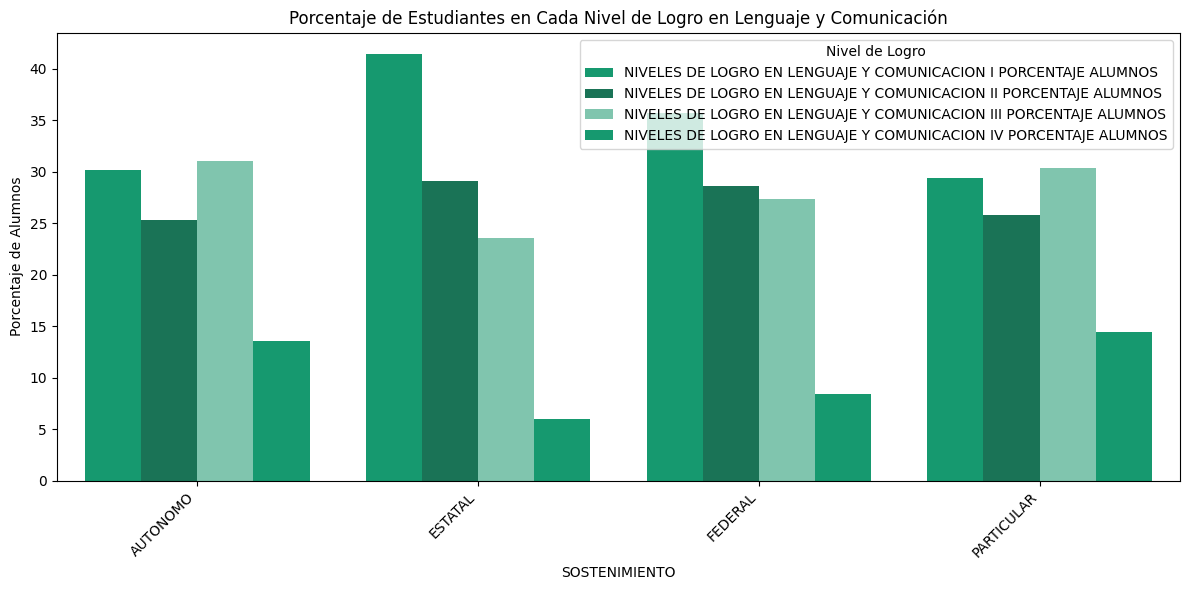

SOSTENIMIENTO  NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0      AUTONOMO                                          58.367096      
1       ESTATAL                                          67.480660      
2       FEDERAL                                          64.761657      
3    PARTICULAR                                          66.043812      

   NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                          23.942974       
1                                          21.828296       
2                                          22.460557       
3                                          20.621156       

   NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                          11.791803        
1                                           7.578577        
2                                           8.897067        
3                                           8.416381        

   NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  
0                                           5.901054      
1                                           3.116052      
2                                           3.882331      
3                                           4.920578

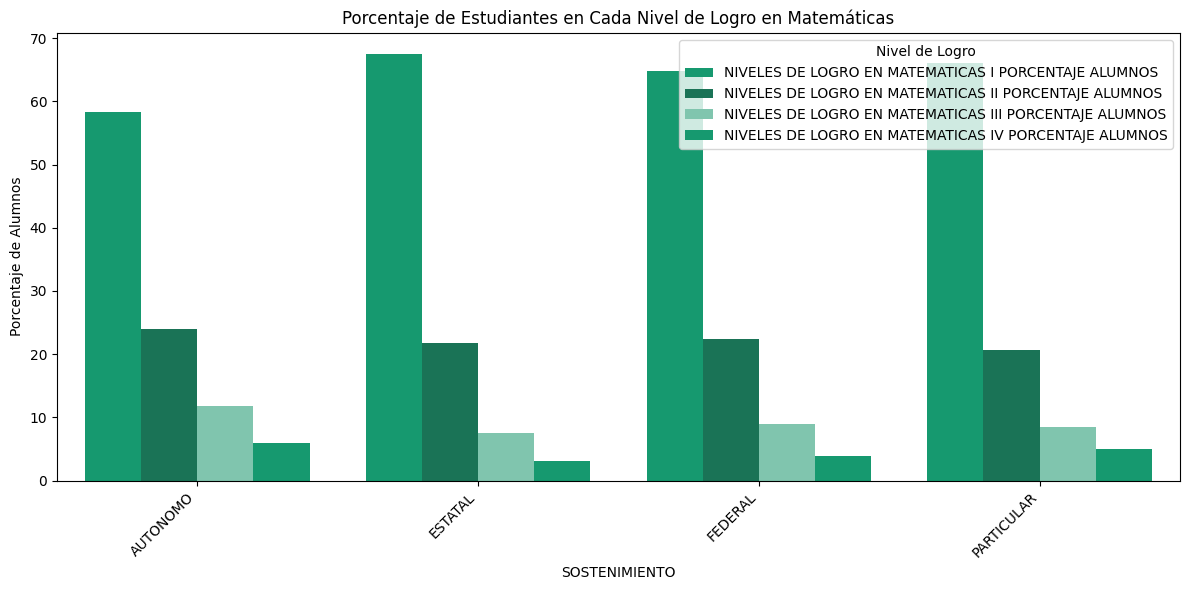

SUBSISTEMA  \
0             BACH ESTATAL DGE-CGE   
1                   BACHI AUTONOMO   
2                           CECYTE   
3                             CETI   
4                           COBACH   
5                      COLBACH MEX   
6                  CONALEP DF -OAX   
7                     CONALEP EDOS   
8                              DGB   
9                          DGECYTM   
10                           DGETA   
11                           DGETI   
12                           EMSAD   
13                             IPN   
14                 OTRAS ESTATALES   
15                 OTRAS FEDERALES   
16                    PARTICULARES   
17                         PREECOS   
18                        PREFECOS   
19               TELEBACHILLERATOS   
20  TELEBACHILLERATOS COMUNITARIOS   

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                           35.409838                  
1                                           30.150585                  
2                                           36.474336                  
3                                            4.350000                  
4                                           38.475934                  
5                                           14.587500                  
6                                           52.198387                  
7                                           39.977169                  
8                                           32.981034                  
9                                           45.686667                  
10                                          46.217725                  
11                                          31.546197                  
12                                          45.353460                  
13                                           3.994286                  
14                                          41.231818                  
15                                           8.200000                  
16                                          27.909871                  
17                                          53.420502                  
18                                          36.918947                  
19                                          43.287362                  
20                                          49.289345                  

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                           30.073094                   
1                                           25.329040                   
2                                           30.305563                   
3                                           12.100000                   
4                                           28.404656                   
5                                           29.625000                   
6                                           29.064516                   
7                                           31.086073                   
8                                           27.375862                   
9                                           27.966667                   
10                                          27.756085                   
11                                          29.868873                   
12                                          27.224740                   
13                                          17.168571                   
14                                          27.304545                   
15                                          20.721053                   
16                                          25.790590                   
17                                          26.409205                   
18                                          25.547368                   
19                                          29.623068                   
20                                          28.003869                

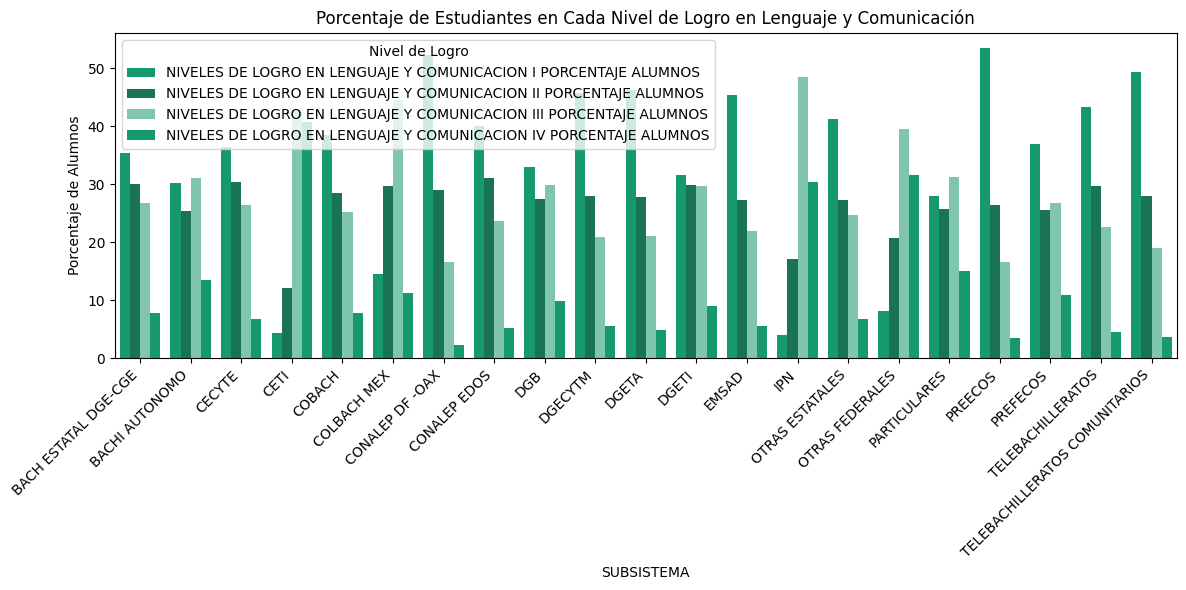

SUBSISTEMA  \
0             BACH ESTATAL DGE-CGE   
1                   BACHI AUTONOMO   
2                           CECYTE   
3                             CETI   
4                           COBACH   
5                      COLBACH MEX   
6                  CONALEP DF -OAX   
7                     CONALEP EDOS   
8                              DGB   
9                          DGECYTM   
10                           DGETA   
11                           DGETI   
12                           EMSAD   
13                             IPN   
14                 OTRAS ESTATALES   
15                 OTRAS FEDERALES   
16                    PARTICULARES   
17                         PREECOS   
18                        PREFECOS   
19               TELEBACHILLERATOS   
20  TELEBACHILLERATOS COMUNITARIOS   

    NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0                                           62.535858      
1                                           58.367096      
2                                           63.294311      
3                                           13.950000      
4                                           66.265377      
5                                           71.467500      
6                                           87.996774      
7                                           67.486073      
8                                           68.753448      
9                                           74.926667      
10                                          69.274074      
11                                          61.459296      
12                                          62.523529      
13                                          19.440000      
14                                          71.845455      
15                                          53.005263      
16                                          65.073224      
17                                          81.902092      
18                                          70.447368      
19                                          69.110099      
20                                          78.133631      

    NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                           24.416085       
1                                           23.942974       
2                                           24.255120       
3                                           27.300000       
4                                           22.234754       
5                                           23.980000       
6                                           10.677419       
7                                           21.600000       
8                                           20.341379       
9                                           17.256667       
10                                          19.834127       
11                                          24.515634       
12                                          23.864100       
13                                          36.645714       
14                                          18.363636       
15                                          29.431579       
16                                          21.038146       
17                                          13.899163       
18                                          18.500000       
19                                          21.210044       
20                                          16.556071       

    NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                            9.212445        
1                                           11.791803        
2                                            9.090013        
3                                           33.650000        
4                                            7.894361        
5                                            3.867500        
6                                            1.130645        
7                          

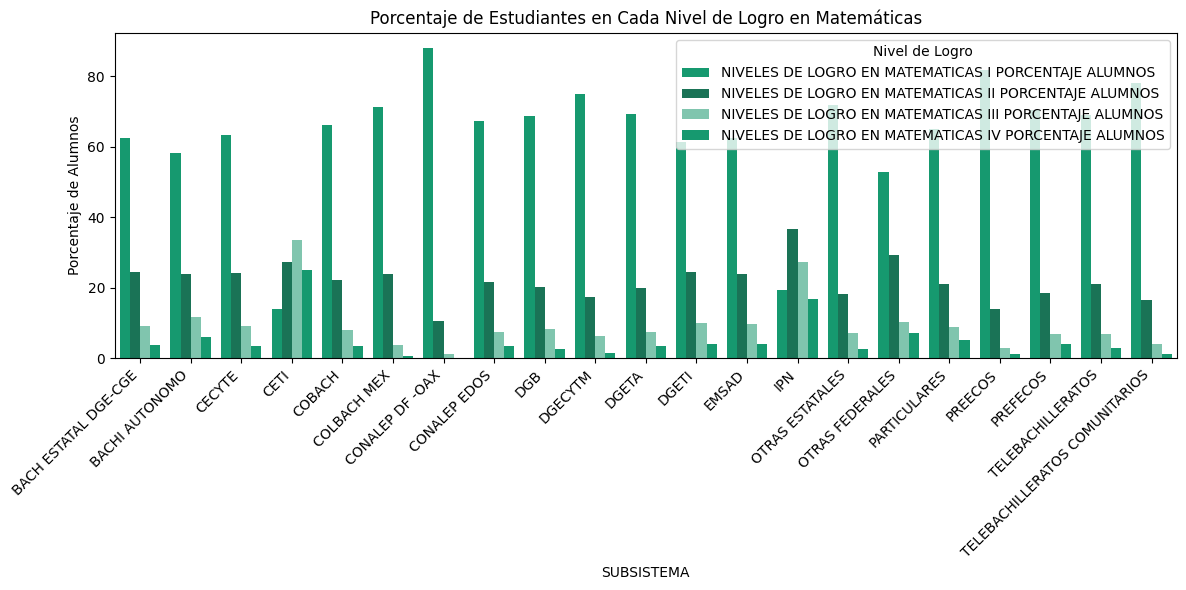

TURNO  \
0  DISCONTINUO   
1     MATUTINO   
2     NOCTURNO   
3   VESPERTINO   

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                          16.156000                  
1                                          34.881707                  
2                                          50.813636                  
3                                          42.107727                  

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                          27.332000                   
1                                          27.558158                   
2                                          26.494697                   
3                                          28.850700                   

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS  \
0                                          40.442000                    
1                                          27.420550                    
2                                          18.391667                    
3                                          23.127926                    

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS  
0                                          16.068000                  
1                                          10.142737                  
2                                           4.303788                  
3                                           5.919340

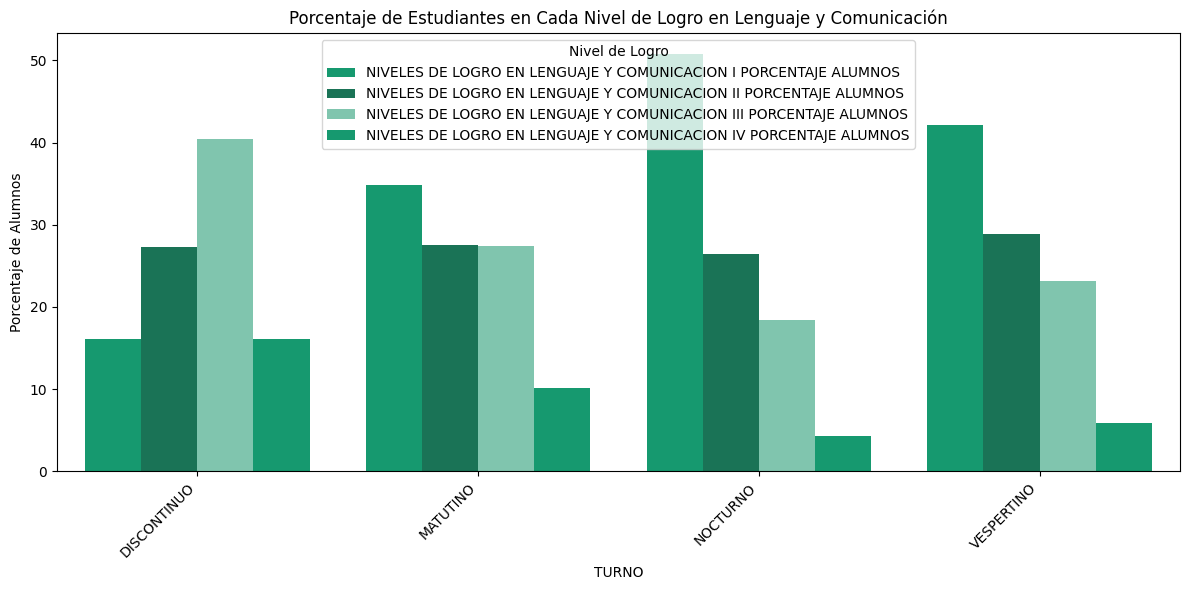

TURNO  NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0  DISCONTINUO                                          58.186000      
1     MATUTINO                                          63.752867      
2     NOCTURNO                                          84.326515      
3   VESPERTINO                                          72.856258      

   NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                          27.576000       
1                                          22.828210       
2                                          12.918182       
3                                          18.706688       

   NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                          10.374000        
1                                           9.055772        
2                                           1.960606        
3                                           5.900542        

   NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  
0                                           3.878000      
1                                           4.365971      
2                                           0.795455      
3                                           2.539607

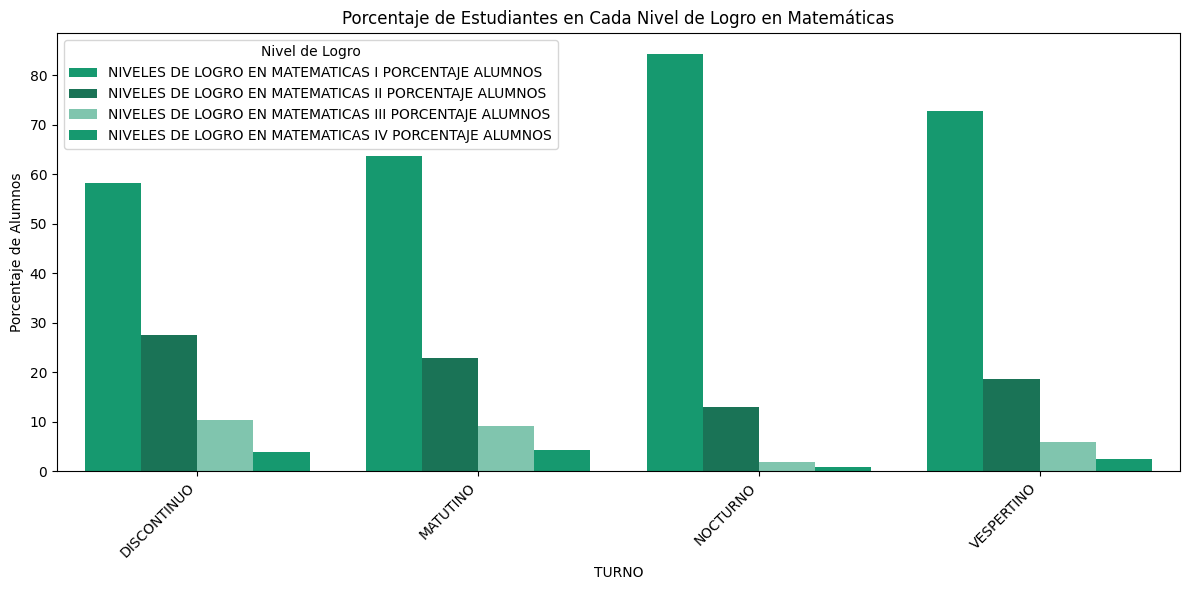

GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT  \
0                                               ALTO                 
1                                               BAJO                 
2                                              MEDIO                 
3                                           MUY ALTO                 
4                                           MUY BAJO                 

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                          45.912721                  
1                                          36.387978                  
2                                          41.084545                  
3                                          58.956751                  
4                                          29.517524                  

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                          28.414220                   
1                                          28.718272                   
2                                          29.335487                   
3                                          22.843936                   
4                                          27.229280                   

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS  \
0                                          21.051100                    
1                                          26.631397                    
2                                          23.512924                    
3                                          15.049886                    
4                                          30.423152                    

   NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS  
0                                           4.627642                  
1                                           8.265809                  
2                                           6.068498                  
3                                           3.151259                  
4                                          12.833685

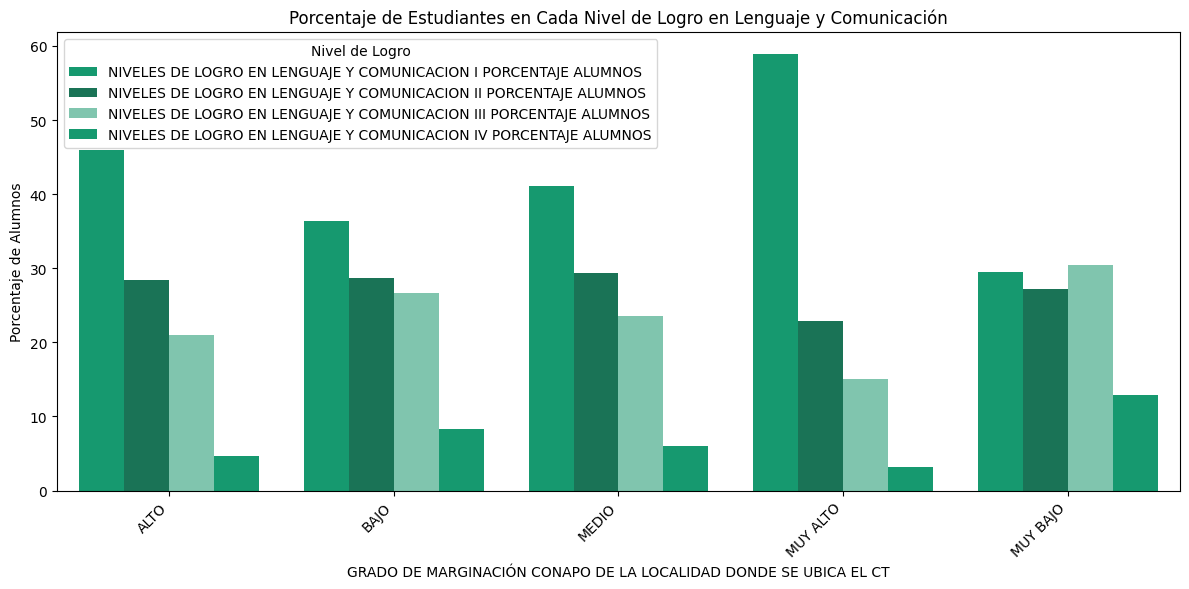

GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT  \
0                                               ALTO                 
1                                               BAJO                 
2                                              MEDIO                 
3                                           MUY ALTO                 
4                                           MUY BAJO                 

   NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0                                          68.807618      
1                                          65.645074      
2                                          67.357889      
3                                          72.840732      
4                                          64.588730      

   NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                          20.700967       
1                                          22.541029       
2                                          21.630264       
3                                          19.124943       
4                                          22.009366       

   NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                           7.349117        
1                                           8.268750        
2                                           7.745288        
3                                           6.219908        
4                                           8.782685        

   NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  
0                                           3.146385      
1                                           3.547243      
2                                           3.269305      
3                                           1.813730      
4                                           4.622026

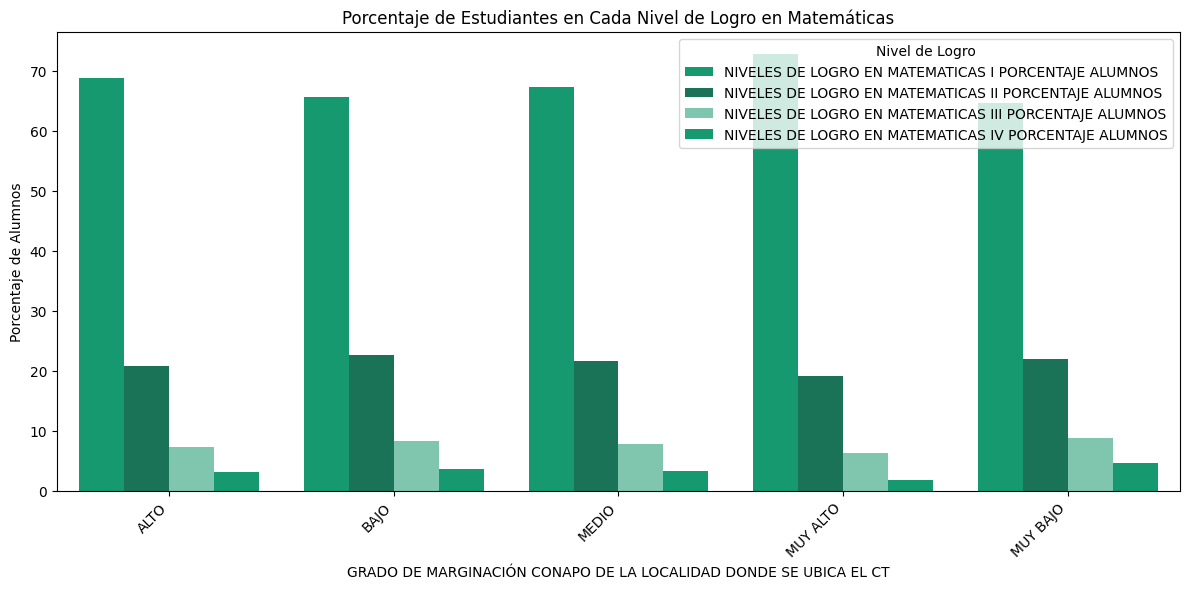

In [224]:


def crear_grafica(df_melted, title, categoria_col):
    """Crea el gráfico de barras con estilo mejorado."""
    plt.figure(figsize=(12, 6))

    # Paleta de colores personalizada basada en #00af77 con tonos más oscuros
    n_colors = len(df_melted["Nivel de Logro"].unique())
    verde_base = "#00af77"
    palette_dark = sns.dark_palette(verde_base, n_colors=n_colors, reverse=True)  # Tonos más oscuros
    palette_light = sns.light_palette(verde_base, n_colors=n_colors // 2 + 1)[1:]  # Tonos más claros, excluyendo el base
    palette = palette_dark[:-len(palette_light)] + palette_light  # Combina y ajusta el orden

    sns.barplot(data=df_melted, x=categoria_col, y="Porcentaje de Alumnos", hue="Nivel de Logro", palette=palette, errorbar=None)

    plt.title(f'Porcentaje de Estudiantes en Cada Nivel de Logro en {title}')
    plt.xlabel(categoria_col)
    plt.ylabel('Porcentaje de Alumnos')
    plt.xticks(rotation=45, ha='right')  # Rotación y alineación de etiquetas
    plt.tight_layout()
    plt.show()

def procesar_y_graficar(df, categorias, nivel_logro_lenguaje, nivel_logro_matematicas):
    """Procesa, muestra y grafica KPIs para múltiples categorías."""
    for categoria in categorias:
        # Lenguaje
        df_lenguaje = calcular_kpis_por_categoria(df, [categoria], nivel_logro_lenguaje)
        df_lenguaje_melted = df_lenguaje.melt(id_vars=categoria, value_vars=nivel_logro_lenguaje, var_name="Nivel de Logro", value_name="Porcentaje de Alumnos")
        display(df_lenguaje)
        crear_grafica(df_lenguaje_melted, "Lenguaje y Comunicación", categoria)

        # Matemáticas
        df_matematicas = calcular_kpis_por_categoria(df, [categoria], nivel_logro_matematicas)
        df_matematicas_melted = df_matematicas.melt(id_vars=categoria, value_vars=nivel_logro_matematicas, var_name="Nivel de Logro", value_name="Porcentaje de Alumnos")
        display(df_matematicas)
        crear_grafica(df_matematicas_melted, "Matemáticas", categoria)

# Lista de categorías
categorias = ["SOSTENIMIENTO", "SUBSISTEMA", "TURNO", "GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT"]

# Llamada a la función principal
procesar_y_graficar(df, categorias, nivel_logro_lenguaje, nivel_logro_matematicas)

A nivel entidad federativa

• Lenguaje y comunicación

o Porcentaje de estudiantes en cada nivel de logro por estado.

o Porcentaje de estudiantes en cada nivel de logro por tipo de
sostenimiento.

o Porcentaje de estudiantes en cada nivel de logro por subsistema.

o Porcentaje de estudiantes en cada nivel de logro por turno.

o Porcentaje de estudiantes en cada nivel de logro grado marginación.



• Matemáticas

o Porcentaje de estudiantes en cada nivel de logro.

o Porcentaje de estudiantes en cada nivel de logro por tipo de
sostenimiento.

o Porcentaje de estudiantes en cada nivel de logro por subsistema.

o Porcentaje de estudiantes en cada nivel de logro por turno.

o Porcentaje de estudiantes en cada nivel de logro grado marginación.


ENTIDAD  \
0        AGUASCALIENTES   
1       BAJA CALIFORNIA   
2   BAJA CALIFORNIA SUR   
3              CAMPECHE   
4               CHIAPAS   
5             CHIHUAHUA   
6      CIUDAD DE MEXICO   
7              COAHUILA   
8                COLIMA   
9               DURANGO   
10           GUANAJUATO   
11             GUERRERO   
12              HIDALGO   
13              JALISCO   
14               MEXICO   
15            MICHOACAN   
16              MORELOS   
17              NAYARIT   
18           NUEVO LEON   
19               OAXACA   
20               PUEBLA   
21            QUERETARO   
22         QUINTANA ROO   
23      SAN LUIS POTOSI   
24              SINALOA   
25               SONORA   
26              TABASCO   
27           TAMAULIPAS   
28             TLAXCALA   
29             VERACRUZ   
30              YUCATAN   
31            ZACATECAS   

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                           33.318692                  
1                                           31.708815                  
2                                           31.853211                  
3                                           33.268657                  
4                                           56.677793                  
5                                           42.697904                  
6                                           27.723515                  
7                                           39.401235                  
8                                           33.072414                  
9                                           40.309091                  
10                                          34.572270                  
11                                          53.772027                  
12                                          32.191633                  
13                                          26.089731                  
14                                          34.594672                  
15                                          44.865125                  
16                                          33.213636                  
17                                          47.429630                  
18                                          41.620541                  
19                                          40.928754                  
20                                          29.411125                  
21                                          24.749035                  
22                                          32.800000                  
23                                          45.684683                  
24                                          36.441315                  
25                                          31.677160                  
26                                          49.452679                  
27                                          38.568514                  
28                                          35.392553                  
29                                          35.738720                  
30                                          31.248148                  
31                                          34.015926                  

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                           28.765421                   
1                                           29.398072                   
2                                           27.027523                   
3                                           30.400746                   
4                                           23.833647                   
5                                           26.641090                   
6                                           26.958195                   
7                                           25.551235                   
8                                           26.728448                   
9                

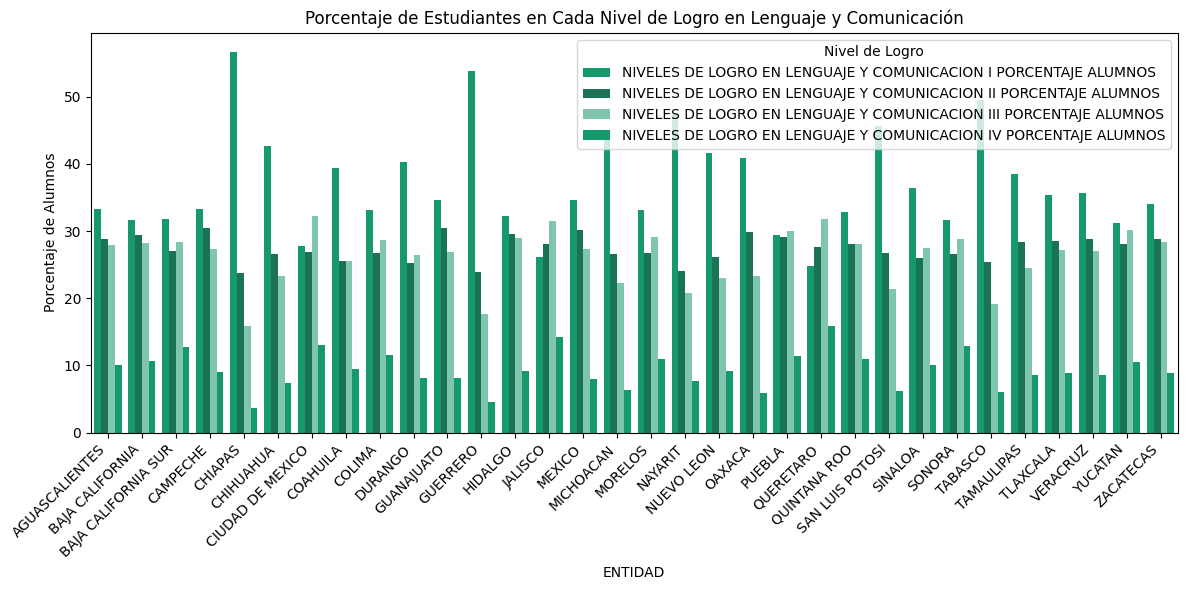

ENTIDAD  NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0        AGUASCALIENTES                                          68.009346      
1       BAJA CALIFORNIA                                          68.896419      
2   BAJA CALIFORNIA SUR                                          65.176147      
3              CAMPECHE                                          68.737313      
4               CHIAPAS                                          69.444953      
5             CHIHUAHUA                                          71.297694      
6      CIUDAD DE MEXICO                                          68.916390      
7              COAHUILA                                          69.686214      
8                COLIMA                                          67.509483      
9               DURANGO                                          64.853497      
10           GUANAJUATO                                          67.115310      
11             GUERRERO                                          73.135343      
12              HIDALGO                                          65.399184      
13              JALISCO                                          54.913936      
14               MEXICO                                          68.990858      
15            MICHOACAN                                          71.978292      
16              MORELOS                                          67.266364      
17              NAYARIT                                          72.901235      
18           NUEVO LEON                                          73.141892      
19               OAXACA                                          67.238658      
20               PUEBLA                                          53.948104      
21            QUERETARO                                          58.557915      
22         QUINTANA ROO                                          71.087745      
23      SAN LUIS POTOSI                                          76.089934      
24              SINALOA                                          61.248592      
25               SONORA                                          62.267901      
26              TABASCO                                          73.683631      
27           TAMAULIPAS                                          71.170277      
28             TLAXCALA                                          67.453191      
29             VERACRUZ                                          66.566768      
30              YUCATAN                                          69.347578      
31            ZACATECAS                                          60.104815      

    NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                           20.591121       
1                                           20.083196       
2                                           20.255046       
3                                           21.383582       
4                                           19.231359       
5                                           19.057862       
6                                           20.448694       
7                                           19.085802       
8                                           20.504310       
9                                           22.058042       
10                                          22.388865       
11                                          16.200000       
12                                          23.793265       
13                                          26.540831       
14                                          21.897084       
15                                          18.954448       
16                                          21.065455       
17                                          17.458025       
18                                          15.990541       
19                                          22.023163       
20                                          27.521176       


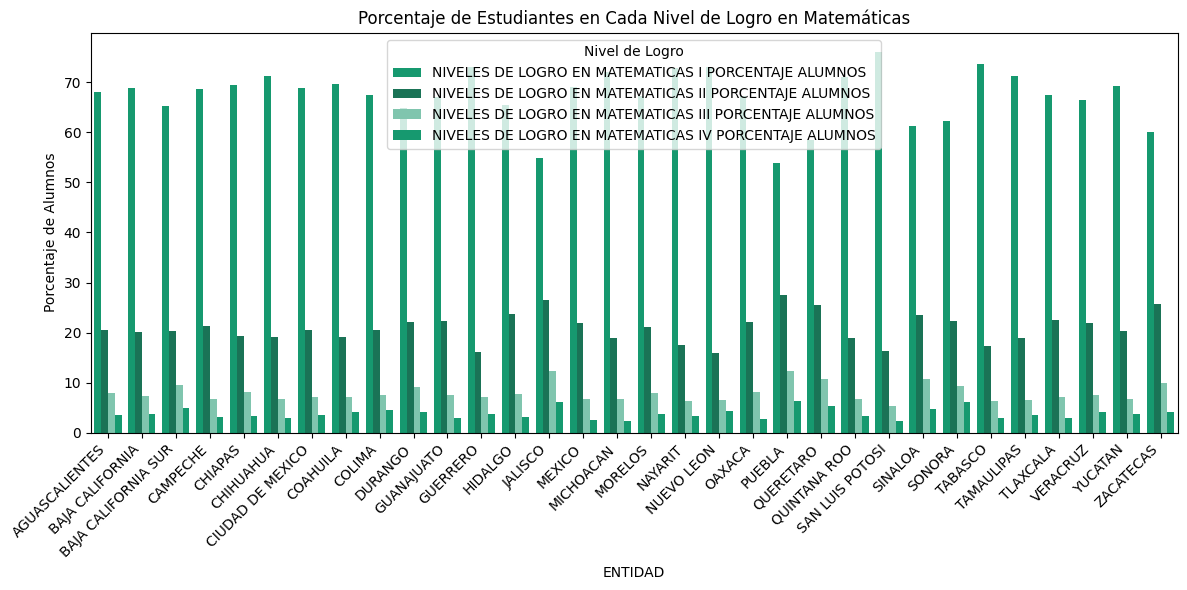

ENTIDAD SOSTENIMIENTO  \
0     AGUASCALIENTES      AUTONOMO   
1     AGUASCALIENTES       ESTATAL   
2     AGUASCALIENTES       FEDERAL   
3     AGUASCALIENTES    PARTICULAR   
4    BAJA CALIFORNIA       ESTATAL   
..               ...           ...   
112          YUCATAN    PARTICULAR   
113        ZACATECAS      AUTONOMO   
114        ZACATECAS       ESTATAL   
115        ZACATECAS       FEDERAL   
116        ZACATECAS    PARTICULAR   

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                             2.600000                  
1                                            41.894898                  
2                                            25.767647                  
3                                            27.410256                  
4                                            33.334868                  
..                                                 ...                  
112                                          19.446939                  
113                                          28.805882                  
114                                          36.220000                  
115                                          29.973913                  
116                                          28.085000                  

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                            10.350000                   
1                                            29.060204                   
2                                            30.835294                   
3                                            28.437179                   
4                                            30.803289                   
..                                                 ...                   
112                                          23.218367                   
113                                          28.152941                   
114                                          30.722632                   
115                                          27.691304                   
116                                          20.605000                   

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS  \
0                                            43.825000                    
1                                            23.600000                    
2                                            31.458824                    
3                                            30.984615                    
4                                            28.053947                    
..                                                 ...                    
112                                          36.805102                    
113                                          33.105882                    
114                                          26.174737                    
115                                          31.256522                    
116                                          34.970000                    

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS  
0                                            43.250000                  
1                                             5.455102                  
2                                            11.941176                  
3                                            13.167949                  
4                                             7.815789                  
..                                                 ...                  
112                                          20.539796                  
113                                           9.952941                  
114                                           6.890526                  
115                                          11.086957                  
116                                          16.342500                  

[117 rows x 

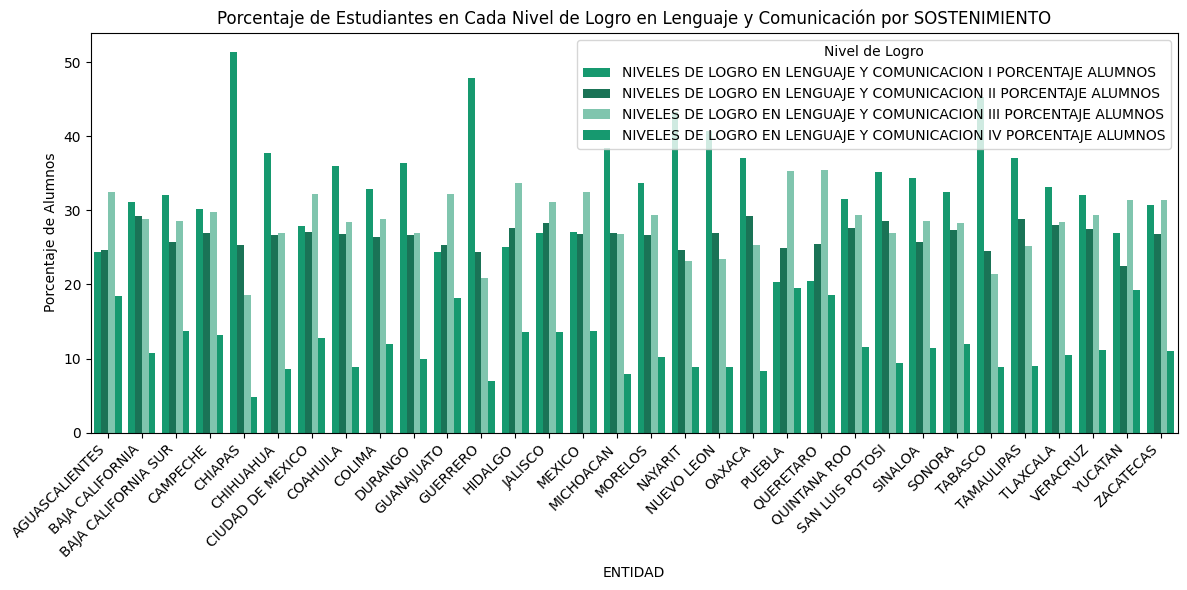

ENTIDAD SOSTENIMIENTO  \
0     AGUASCALIENTES      AUTONOMO   
1     AGUASCALIENTES       ESTATAL   
2     AGUASCALIENTES       FEDERAL   
3     AGUASCALIENTES    PARTICULAR   
4    BAJA CALIFORNIA       ESTATAL   
..               ...           ...   
112          YUCATAN    PARTICULAR   
113        ZACATECAS      AUTONOMO   
114        ZACATECAS       ESTATAL   
115        ZACATECAS       FEDERAL   
116        ZACATECAS    PARTICULAR   

     NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0                                            25.075000      
1                                            72.233673      
2                                            58.647059      
3                                            68.984615      
4                                            67.655921      
..                                                 ...      
112                                          59.574490      
113                                          65.852941      
114                                          60.652632      
115                                          55.178261      
116                                          57.892500      

     NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                            32.975000       
1                                            20.237755       
2                                            25.344118       
3                                            18.328205       
4                                            23.103947       
..                                                 ...       
112                                          23.878571       
113                                          22.064706       
114                                          26.208947       
115                                          24.769565       
116                                          26.055000       

     NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                            25.450000        
1                                             6.015306        
2                                            12.055882        
3                                             7.665385        
4                                             6.623684        
..                                                 ...        
112                                           9.875510        
113                                           9.200000        
114                                           9.995789        
115                                          11.326087        
116                                           9.690000        

     NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  
0                                            16.525000      
1                                             1.526531      
2                                             3.944118      
3                                             5.024359      
4                                             2.615789      
..                                                 ...      
112                                           6.676531      
113                                           2.876471      
114                                           3.144737      
115                                           8.726087      
116                                           6.367500      

[117 rows x 6 columns]

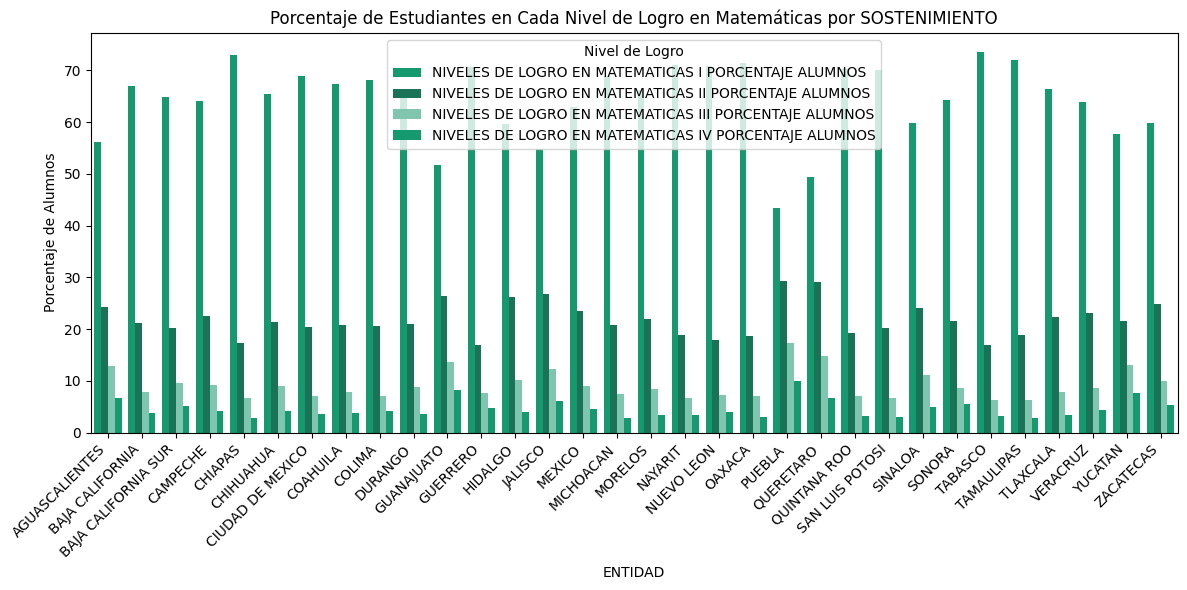

ENTIDAD                      SUBSISTEMA  \
0    AGUASCALIENTES            BACH ESTATAL DGE-CGE   
1    AGUASCALIENTES                  BACHI AUTONOMO   
2    AGUASCALIENTES                          CECYTE   
3    AGUASCALIENTES                    CONALEP EDOS   
4    AGUASCALIENTES                             DGB   
..              ...                             ...   
397       ZACATECAS                           DGETI   
398       ZACATECAS                           EMSAD   
399       ZACATECAS                             IPN   
400       ZACATECAS                    PARTICULARES   
401       ZACATECAS  TELEBACHILLERATOS COMUNITARIOS   

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                             8.650000                  
1                                             2.600000                  
2                                            36.873684                  
3                                            27.900000                  
4                                            22.833333                  
..                                                 ...                  
397                                          31.740000                  
398                                          30.097619                  
399                                           1.600000                  
400                                          28.085000                  
401                                          44.123214                  

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                            20.700000                   
1                                            10.350000                   
2                                            32.826316                   
3                                            29.222222                   
4                                            30.616667                   
..                                                 ...                   
397                                          29.770000                   
398                                          29.657143                   
399                                           9.400000                   
400                                          20.605000                   
401                                          30.233929                   

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS  \
0                                            50.000000                    
1                                            43.825000                    
2                                            25.452632                    
3                                            35.200000                    
4                                            31.433333                    
..                                                 ...                    
397                                          29.830000                    
398                                          30.569048                    
399                                          53.100000                    
400                                          34.970000                    
401                                          20.389286                    

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS  
0                                            20.675000                  
1                                            43.250000                  
2                                             4.831579                  
3                                             7.700000                  
4                                            15.116667                  
..                                                 ...                  
397                                           8.650000                  
398                                           9.676190                  
399                        

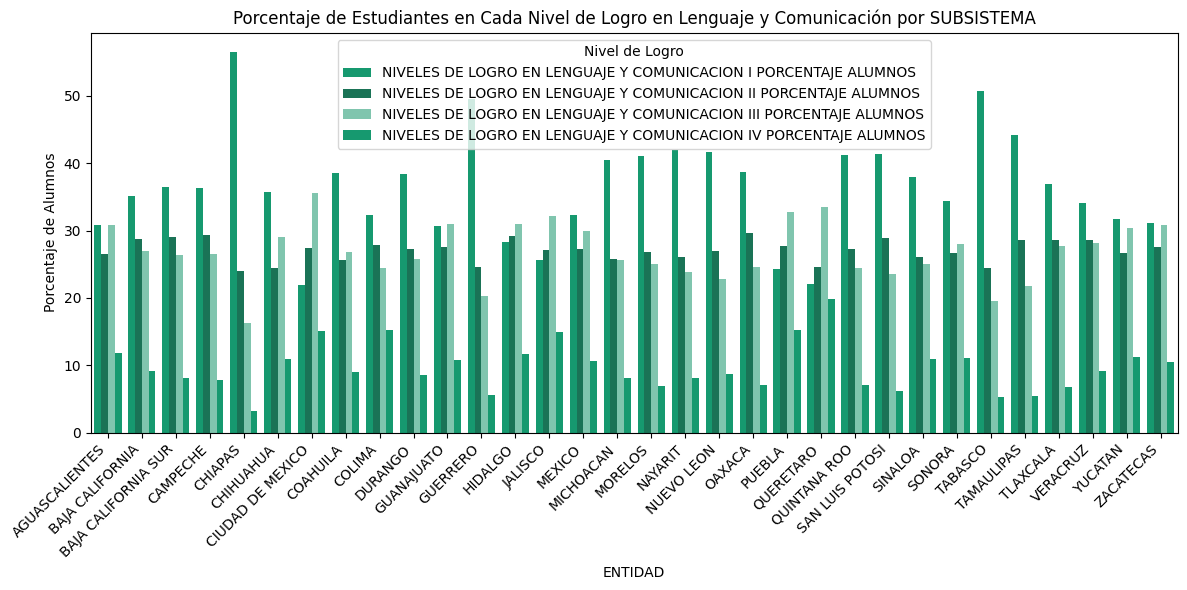

ENTIDAD                      SUBSISTEMA  \
0    AGUASCALIENTES            BACH ESTATAL DGE-CGE   
1    AGUASCALIENTES                  BACHI AUTONOMO   
2    AGUASCALIENTES                          CECYTE   
3    AGUASCALIENTES                    CONALEP EDOS   
4    AGUASCALIENTES                             DGB   
..              ...                             ...   
397       ZACATECAS                           DGETI   
398       ZACATECAS                           EMSAD   
399       ZACATECAS                             IPN   
400       ZACATECAS                    PARTICULARES   
401       ZACATECAS  TELEBACHILLERATOS COMUNITARIOS   

     NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0                                            74.525000      
1                                            25.075000      
2                                            68.621053      
3                                            59.677778      
4                                            62.450000      
..                                                 ...      
397                                          61.990000      
398                                          41.050000      
399                                          18.500000      
400                                          57.892500      
401                                          77.512500      

     NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                            17.625000       
1                                            32.975000       
2                                            24.252632       
3                                            24.822222       
4                                            24.650000       
..                                                 ...       
397                                          24.030000       
398                                          37.030952       
399                                          30.800000       
400                                          26.055000       
401                                          16.294643       

     NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                             7.500000        
1                                            25.450000        
2                                             5.410526        
3                                            12.377778        
4                                            10.833333        
..                                                 ...        
397                                          10.080000        
398                                          15.907143        
399                                          24.600000        
400                                           9.690000        
401                                           5.546429        

     NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  
0                                             0.375000      
1                                            16.525000      
2                                             1.742105      
3                                             3.144444      
4                                             2.066667      
..                                                 ...      
397                                           3.900000      
398                                           6.011905      
399                                          26.200000      
400                                           6.367500      
401                                           0.650000      

[402 rows x 6 columns]

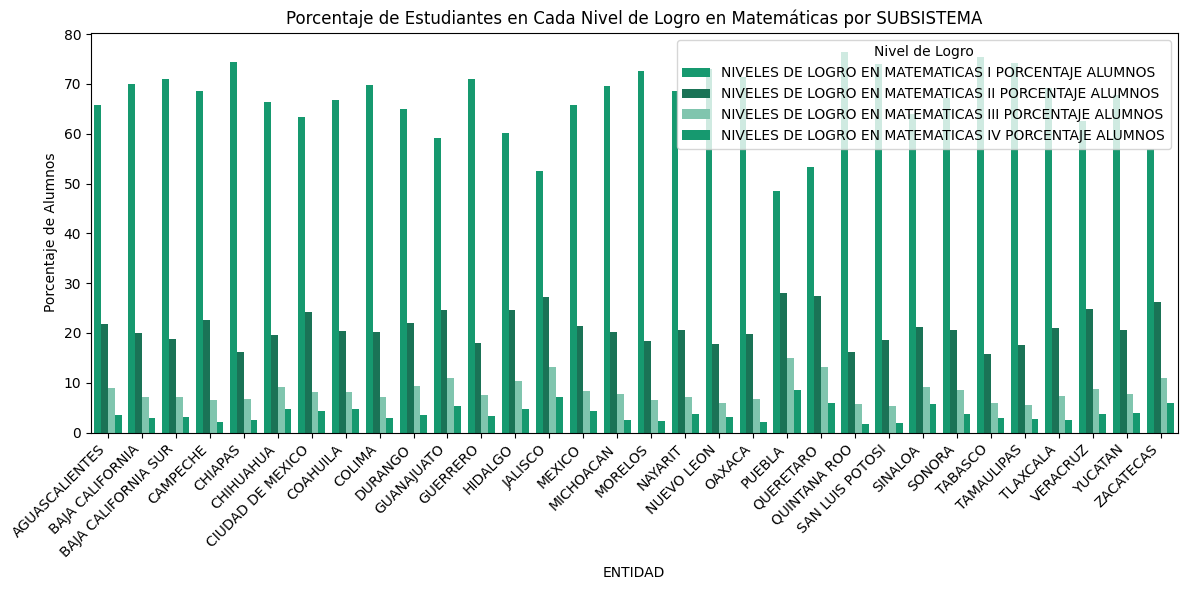

ENTIDAD       TURNO  \
0    AGUASCALIENTES    MATUTINO   
1    AGUASCALIENTES    NOCTURNO   
2    AGUASCALIENTES  VESPERTINO   
3   BAJA CALIFORNIA    MATUTINO   
4   BAJA CALIFORNIA    NOCTURNO   
..              ...         ...   
86          YUCATAN    MATUTINO   
87          YUCATAN    NOCTURNO   
88          YUCATAN  VESPERTINO   
89        ZACATECAS    MATUTINO   
90        ZACATECAS  VESPERTINO   

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                           28.123387                  
1                                           46.400000                  
2                                           40.410112                  
3                                           28.705350                  
4                                           38.375000                  
..                                                ...                  
86                                          26.325381                  
87                                          35.850000                  
88                                          37.590667                  
89                                          31.710132                  
90                                          46.188372                  

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                           28.087903                   
1                                           35.700000                   
2                                           29.631461                   
3                                           28.119342                   
4                                           35.225000                   
..                                                ...                   
86                                          27.160914                   
87                                          19.425000                   
88                                          29.526667                   
89                                          28.599559                   
90                                          29.881395                   

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS  \
0                                           30.632258                    
1                                           14.300000                    
2                                           24.289888                    
3                                           29.714403                    
4                                           22.875000                    
..                                                ...                    
86                                          32.502538                    
87                                          41.925000                    
88                                          26.611333                    
89                                          29.967401                    
90                                          19.793023                    

    NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS  
0                                           13.154839                  
1                                            3.600000                  
2                                            5.684270                  
3                                           13.465432                  
4                                            3.525000                  
..                                                ...                  
86                                          14.019797                  
87                                           2.775000                  
88                                           6.269333                  
89                                           9.727753                  
90                                           4.160465                  

[91 rows x 6 columns]

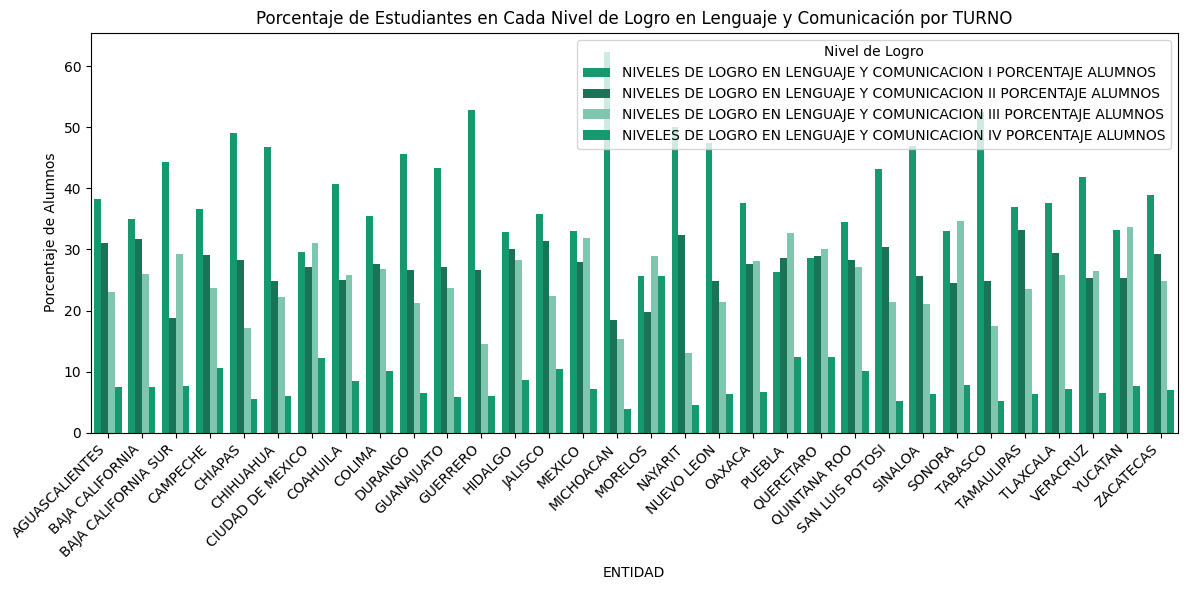

ENTIDAD       TURNO  \
0    AGUASCALIENTES    MATUTINO   
1    AGUASCALIENTES    NOCTURNO   
2    AGUASCALIENTES  VESPERTINO   
3   BAJA CALIFORNIA    MATUTINO   
4   BAJA CALIFORNIA    NOCTURNO   
..              ...         ...   
86          YUCATAN    MATUTINO   
87          YUCATAN    NOCTURNO   
88          YUCATAN  VESPERTINO   
89        ZACATECAS    MATUTINO   
90        ZACATECAS  VESPERTINO   

    NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0                                           63.708065      
1                                           96.600000      
2                                           73.680899      
3                                           65.186420      
4                                           89.050000      
..                                                ...      
86                                          63.143655      
87                                          94.450000      
88                                          76.826000      
89                                          56.417181      
90                                          79.572093      

    NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                           22.004839       
1                                            3.400000       
2                                           18.814607       
3                                           21.293827       
4                                           10.950000       
..                                                ...       
86                                          23.550254       
87                                           3.325000       
88                                          16.426667       
89                                          27.618502       
90                                          16.216279       

    NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                            9.368548        
1                                            0.000000        
2                                            6.038202        
3                                            8.650617        
4                                            0.000000        
..                                                ...        
86                                           8.353807        
87                                           0.550000        
88                                           4.774000        
89                                          11.149780        
90                                           4.016279        

    NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  
0                                            4.926613      
1                                            0.000000      
2                                            1.469663      
3                                            4.870370      
4                                            0.000000      
..                                                ...      
86                                           4.958376      
87                                           1.675000      
88                                           1.978667      
89                                           4.816300      
90                                           0.197674      

[91 rows x 6 columns]

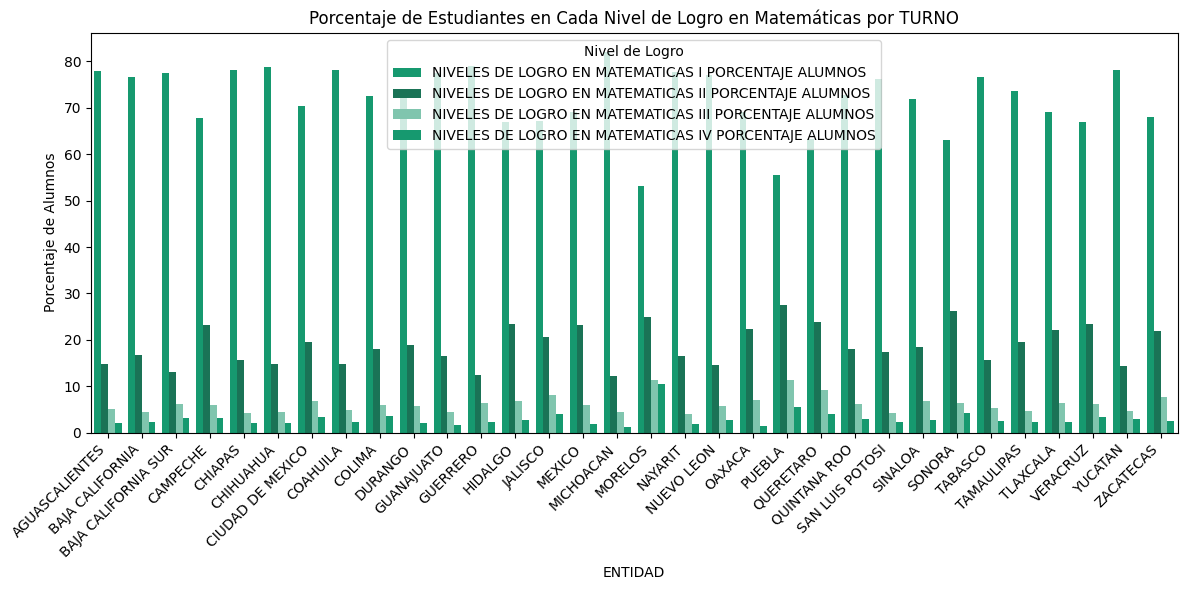

ENTIDAD  \
0     AGUASCALIENTES   
1     AGUASCALIENTES   
2     AGUASCALIENTES   
3     AGUASCALIENTES   
4    BAJA CALIFORNIA   
..               ...   
142        ZACATECAS   
143        ZACATECAS   
144        ZACATECAS   
145        ZACATECAS   
146        ZACATECAS   

    GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT  \
0                                                 ALTO                 
1                                                 BAJO                 
2                                                MEDIO                 
3                                             MUY BAJO                 
4                                                 ALTO                 
..                                                 ...                 
142                                               ALTO                 
143                                               BAJO                 
144                                              MEDIO                 
145                                           MUY ALTO                 
146                                           MUY BAJO                 

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS  \
0                                            53.811111                  
1                                            37.194872                  
2                                            52.665000                  
3                                            28.369863                  
4                                            49.888889                  
..                                                 ...                  
142                                          46.244000                  
143                                          36.250000                  
144                                          37.585455                  
145                                          50.000000                  
146                                          27.462617                  

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS  \
0                                            30.488889                   
1                                            28.951282                   
2                                            27.765000                   
3                                            28.746575                   
4                                            22.600000                   
..                                                 ...                   
142                                          27.880000                   
143                                          30.379268                   
144                                          30.794545                   
145                                          46.200000                   
146                                          26.626168                   

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS  \
0                                            12.533333                    
1                                            24.815385                    
2                                            17.085000                    
3                                            31.179452                    
4                                            22.288889                    
..                                                 ...                    
142                                          20.792000                    
143                                          27.089024                    
144                                          24.063636                    
145                                           3.800000                    
146                                          33.507477                    

     NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS  
0                                             3.188889                  
1                                             

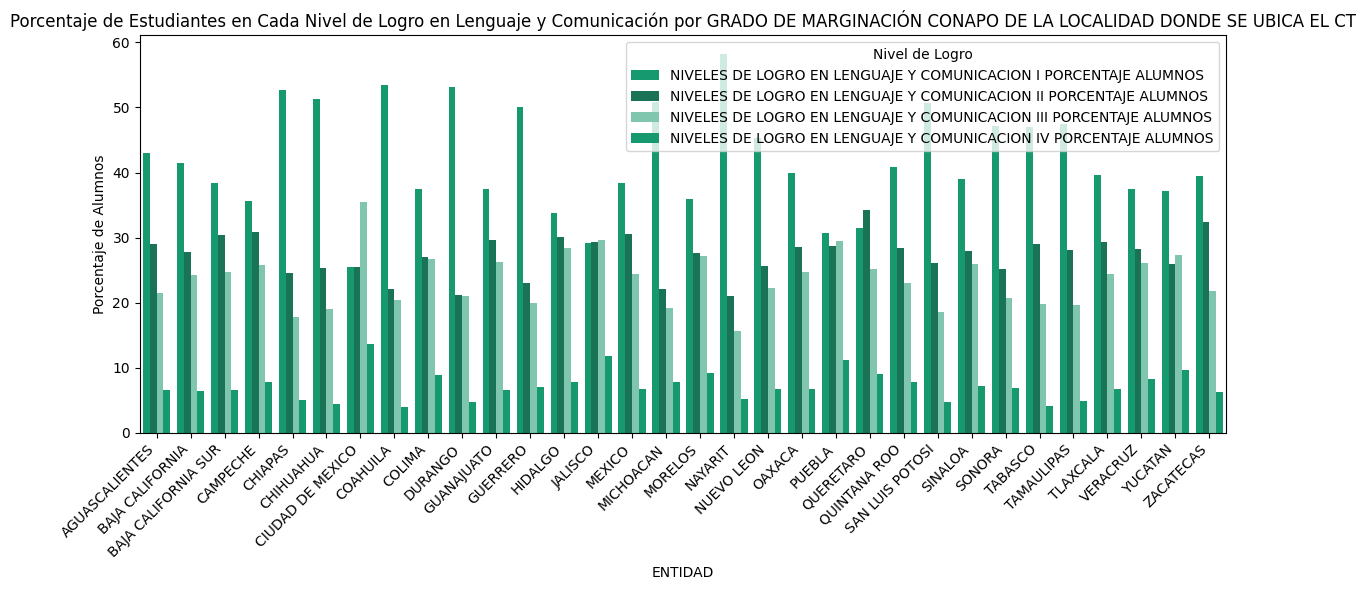

ENTIDAD  \
0     AGUASCALIENTES   
1     AGUASCALIENTES   
2     AGUASCALIENTES   
3     AGUASCALIENTES   
4    BAJA CALIFORNIA   
..               ...   
142        ZACATECAS   
143        ZACATECAS   
144        ZACATECAS   
145        ZACATECAS   
146        ZACATECAS   

    GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT  \
0                                                 ALTO                 
1                                                 BAJO                 
2                                                MEDIO                 
3                                             MUY BAJO                 
4                                                 ALTO                 
..                                                 ...                 
142                                               ALTO                 
143                                               BAJO                 
144                                              MEDIO                 
145                                           MUY ALTO                 
146                                           MUY BAJO                 

     NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS  \
0                                            78.444444      
1                                            65.310256      
2                                            81.930000      
3                                            66.180137      
4                                            71.622222      
..                                                 ...      
142                                          71.384000      
143                                          57.440244      
144                                          63.514545      
145                                          50.000000      
146                                          57.853271      

     NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS  \
0                                            16.677778       
1                                            23.707692       
2                                            13.910000       
3                                            20.915068       
4                                            25.555556       
..                                                 ...       
142                                          20.872000       
143                                          28.903659       
144                                          22.885455       
145                                          46.200000       
146                                          25.886916       

     NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS  \
0                                             4.400000        
1                                             8.010256        
2                                             3.180000        
3                                             8.791096        
4                                             2.833333        
..                                                 ...        
142                                           6.484000        
143                                          10.196341        
144                                           9.898182        
145                                           3.800000        
146                                          10.815888        

     NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS  
0                                             0.477778      
1                                             2.987179      
2                                             0.975000      
3                                             4.119178      
4                                             0.000000      
..                                                 ...      
142                                           1.260000      
143                                           3.462195      
144                                           3.710909      
145           

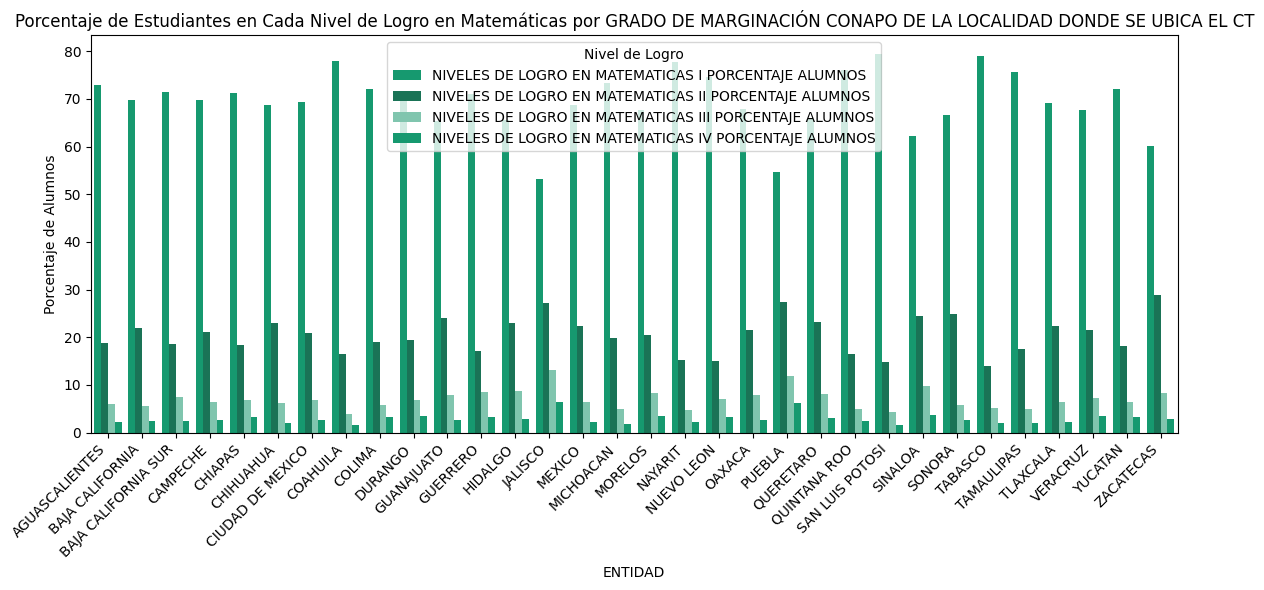

In [225]:

# (Tus funciones calcular_kpis_por_categoria y crear_grafica aquí)

def mostrar_tabla(df):
    """Muestra un DataFrame."""
    display(df)

def procesar_y_graficar_entidad(df, nivel_logro_lenguaje, nivel_logro_matematicas):
    """Procesa y grafica KPIs por entidad."""
    # KPIs por entidad
    df_lenguaje_entidad = calcular_kpis_por_categoria(df, ["ENTIDAD"], nivel_logro_lenguaje)
    df_matematicas_entidad = calcular_kpis_por_categoria(df, ["ENTIDAD"], nivel_logro_matematicas)

    # Transformación y gráficos
    df_lenguaje_entidad_melted = df_lenguaje_entidad.melt(id_vars="ENTIDAD", value_vars=nivel_logro_lenguaje, var_name="Nivel de Logro", value_name="Porcentaje de Alumnos")
    df_matematicas_entidad_melted = df_matematicas_entidad.melt(id_vars="ENTIDAD", value_vars=nivel_logro_matematicas, var_name="Nivel de Logro", value_name="Porcentaje de Alumnos")

    mostrar_tabla(df_lenguaje_entidad)
    crear_grafica(df_lenguaje_entidad_melted, "Lenguaje y Comunicación", "ENTIDAD")
    mostrar_tabla(df_matematicas_entidad)
    crear_grafica(df_matematicas_entidad_melted, "Matemáticas", "ENTIDAD")

def procesar_y_graficar_entidad_categorias(df, categorias_adicionales, nivel_logro_lenguaje, nivel_logro_matematicas):
    """Procesa y grafica KPIs por entidad y categorías adicionales."""
    for categoria in categorias_adicionales:
        # KPIs por entidad y categoría
        df_lenguaje = calcular_kpis_por_categoria(df, ["ENTIDAD", categoria], nivel_logro_lenguaje)
        df_matematicas = calcular_kpis_por_categoria(df, ["ENTIDAD", categoria], nivel_logro_matematicas)

        # Transformación y gráficos
        df_lenguaje_melted = df_lenguaje.melt(id_vars=["ENTIDAD", categoria], value_vars=nivel_logro_lenguaje, var_name="Nivel de Logro", value_name="Porcentaje de Alumnos")
        df_matematicas_melted = df_matematicas.melt(id_vars=["ENTIDAD", categoria], value_vars=nivel_logro_matematicas, var_name="Nivel de Logro", value_name="Porcentaje de Alumnos")

        mostrar_tabla(df_lenguaje)
        crear_grafica(df_lenguaje_melted, f"Lenguaje y Comunicación por {categoria}", "ENTIDAD")
        mostrar_tabla(df_matematicas)
        crear_grafica(df_matematicas_melted, f"Matemáticas por {categoria}", "ENTIDAD")

# Lista de categorías adicionales
categorias_adicionales = ["SOSTENIMIENTO", "SUBSISTEMA", "TURNO", "GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT"]

# Llamadas a las funciones principales
procesar_y_graficar_entidad(df, nivel_logro_lenguaje, nivel_logro_matematicas)
procesar_y_graficar_entidad_categorias(df, categorias_adicionales, nivel_logro_lenguaje, nivel_logro_matematicas)

In [226]:
# Suponiendo que ya tienes un DataFrame df con una columna 'CLAVE DE LA ESCUELA'

# Definir la función para calcular el total de escuelas únicas
def calcular_total_escuelas(df):
    # Contamos el número de claves de escuela únicas
    total_escuelas = df["CLAVE DE LA ESCUELA"].nunique()
    return total_escuelas

# Calcular el total de escuelas evaluadas
total_escuelas = calcular_total_escuelas(df)

# Imprimir el total de escuelas en Jupyter
total_escuelas


14634

c) Chunk de 5 entidades con el mayor porcentaje de estudiantes con nivel 4 de Matemáticas, ordenados de manera descendente

Top 5 entidades con mayor porcentaje de estudiantes en el nivel 4 de Matemáticas:
                ENTIDAD  NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS
20               PUEBLA                                           6.274336    
25               SONORA                                           6.157099    
13              JALISCO                                           6.146944    
21            QUERETARO                                           5.247104    
2   BAJA CALIFORNIA SUR                                           5.021101    


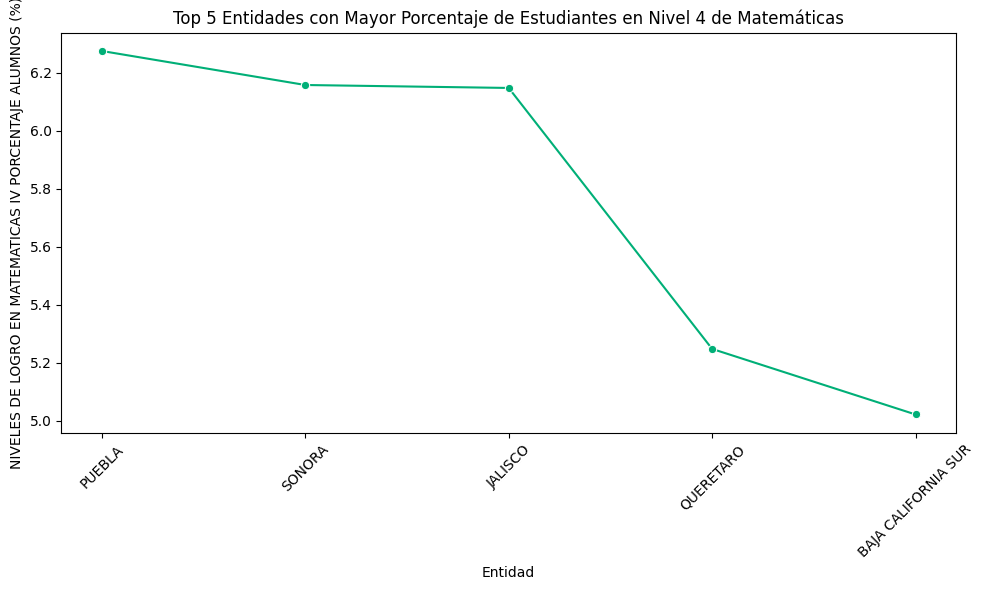

In [227]:

def crear_grafica(df_melted, title, categoria_col):
    """Crea el gráfico de barras con estilo mejorado."""
    plt.figure(figsize=(12, 6))

    # Paleta de colores personalizada basada en #00af77 con tonos más oscuros y claros combinados
    n_colors = len(df_melted["Nivel de Logro"].unique())
    verde_base = "#00af77"
    palette_dark = sns.dark_palette(verde_base, n_colors=n_colors, reverse=True)  # Tonos más oscuros
    palette_light = sns.light_palette(verde_base, n_colors=n_colors // 2 + 1)[1:]  # Tonos más claros, excluyendo el base
    palette = palette_dark[:-len(palette_light)] + palette_light  # Combina y ajusta el orden

    sns.barplot(data=df_melted, x=categoria_col, y="Porcentaje de Alumnos", hue="Nivel de Logro", palette=palette, errorbar=None)

    plt.title(f'Porcentaje de Estudiantes en Cada Nivel de Logro en {title}')
    plt.xlabel(categoria_col)
    plt.ylabel('Porcentaje de Alumnos')
    plt.xticks(rotation=45, ha='right')  # Rotación y alineación de etiquetas
    plt.tight_layout()
    plt.show()

def top_5_entidades_nivel_4_matematicas(df, nivel_4_matematicas):
    """Calcula y muestra el top 5 de entidades con mayor porcentaje en nivel 4 de Matemáticas."""

    # Crear un DataFrame solo con la entidad y el porcentaje de alumnos en nivel 4 de Matemáticas
    top_entidades_matematicas = df[['ENTIDAD', nivel_4_matematicas]]

    # Agrupar por "ENTIDAD" y calcular el promedio de porcentaje de estudiantes en nivel 4
    top_entidades_matematicas_avg = top_entidades_matematicas.groupby('ENTIDAD')[nivel_4_matematicas].mean().reset_index()

    # Ordenar de manera descendente según el porcentaje de alumnos en nivel 4 de Matemáticas
    top_entidades_matematicas_sorted = top_entidades_matematicas_avg.sort_values(by=nivel_4_matematicas, ascending=False)

    # Obtener el top 5 de entidades
    top_5_entidades_matematicas = top_entidades_matematicas_sorted.head(5)

    # Imprimir la tabla con el top 5 de entidades
    print("Top 5 entidades con mayor porcentaje de estudiantes en el nivel 4 de Matemáticas:")
    print(top_5_entidades_matematicas)

    # Graficar el top 5 de entidades con el mayor porcentaje en el nivel 4 de Matemáticas (Gráfico de Líneas)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=top_5_entidades_matematicas, x='ENTIDAD', y=nivel_4_matematicas, marker='o', color="#00af77")  # Gráfico de líneas con marcadores
    plt.title('Top 5 Entidades con Mayor Porcentaje de Estudiantes en Nivel 4 de Matemáticas')
    plt.xlabel('Entidad')
    plt.ylabel(f'{nivel_4_matematicas} (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Llamada a la función principal
nivel_4_matematicas = "NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS"
top_5_entidades_nivel_4_matematicas(df, nivel_4_matematicas)

Porcentaje de estudiantes evaluados en el nivel 4 de Matemáticas por entidad:

Porcentaje de estudiantes evaluados en el nivel 4 de Matemáticas por entidad:
                ENTIDAD  NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS
20               PUEBLA                                           6.274336    
25               SONORA                                           6.157099    
13              JALISCO                                           6.146944    
21            QUERETARO                                           5.247104    
2   BAJA CALIFORNIA SUR                                           5.021101    
24              SINALOA                                           4.640845    
8                COLIMA                                           4.500862    
18           NUEVO LEON                                           4.341622    
31            ZACATECAS                                           4.080741    
9               DURANGO                                           4.063287    
7              COAHUILA                              

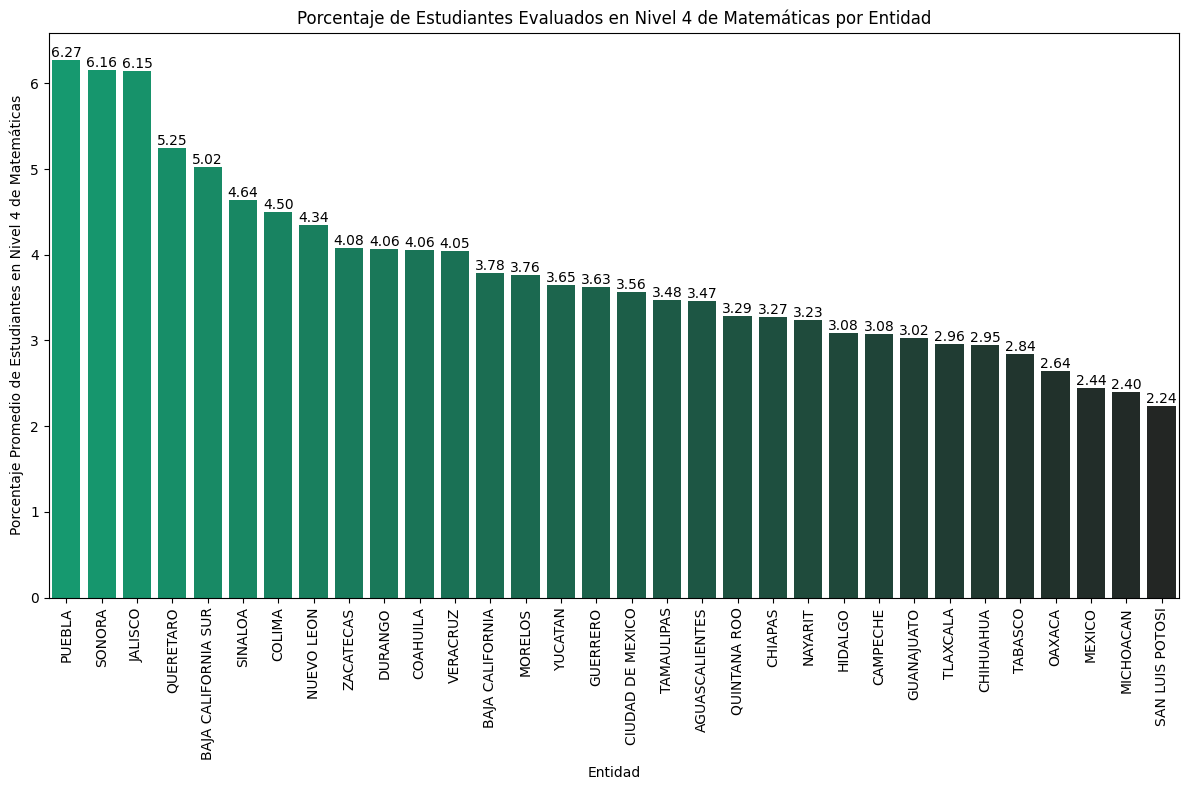

In [228]:


def crear_grafica(df_melted, title, categoria_col):
    """Crea el gráfico de barras con estilo mejorado."""
    plt.figure(figsize=(12, 6))

    # Paleta de colores personalizada basada en #00af77 con tonos más oscuros
    n_colors = len(df_melted["Nivel de Logro"].unique())
    verde_base = "#00af77"
    palette = sns.dark_palette(verde_base, n_colors=n_colors, reverse=True)

    sns.barplot(data=df_melted, x=categoria_col, y="Porcentaje de Alumnos", hue="Nivel de Logro", palette=palette, errorbar=None)

    plt.title(f'Porcentaje de Estudiantes en Cada Nivel de Logro en {title}')
    plt.xlabel(categoria_col)
    plt.ylabel('Porcentaje de Alumnos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Asumo que 'df' es tu DataFrame original

# TODAS LAS ENTIDADES

# Filtrar las columnas necesarias: "Entidad" y "Porcentaje de alumnos evaluados en Matemáticas nivel IV"
nivel_4_matematicas = "NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS"

# Crear un DataFrame solo con la entidad y el porcentaje de alumnos en nivel 4 de Matemáticas
entidades_matematicas = df[['ENTIDAD', nivel_4_matematicas]]

# Agrupar por "ENTIDAD" y calcular el promedio de porcentaje de estudiantes en nivel 4
entidades_matematicas_avg = entidades_matematicas.groupby('ENTIDAD')[nivel_4_matematicas].mean().reset_index()

# Ordenar de manera descendente según el porcentaje de alumnos en nivel 4 de Matemáticas
entidades_matematicas_sorted = entidades_matematicas_avg.sort_values(by=nivel_4_matematicas, ascending=False)

# Imprimir la tabla con los datos completos (todas las entidades)
print("Porcentaje de estudiantes evaluados en el nivel 4 de Matemáticas por entidad:")
print(entidades_matematicas_sorted)

# Graficar todos los datos de las entidades con el mayor porcentaje en el nivel 4 de Matemáticas
plt.figure(figsize=(12, 8))

# Crear la paleta personalizada con varios tonos
n_colors_entidades = len(entidades_matematicas_sorted)
verde_base = "#00af77"
palette_entidades = sns.dark_palette(verde_base, n_colors=n_colors_entidades, reverse=True)

# Crear una variable ficticia para usar con hue con múltiples categorías
entidades_matematicas_sorted['hue_dummy'] = np.arange(len(entidades_matematicas_sorted))

sns.barplot(data=entidades_matematicas_sorted, x='ENTIDAD', y=nivel_4_matematicas, hue='hue_dummy', palette=palette_entidades, legend=False)

plt.title('Porcentaje de Estudiantes Evaluados en Nivel 4 de Matemáticas por Entidad')
plt.xlabel('Entidad')
plt.ylabel(f'Porcentaje Promedio de Estudiantes en Nivel 4 de Matemáticas')
plt.xticks(rotation=90)

# Añadir etiquetas de valor
for index, value in enumerate(entidades_matematicas_sorted[nivel_4_matematicas]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

g) De la entidad con el mayor nivel de logro en Matemáticas, qué
tipo de sostenimiento aporta más a este resultado y de ahí, a
qué subsistema(S) pertenece

Filtrar las columnas necesarias: "Entidad", "Porcentaje de estudiantes evaluados en Matemáticas nivel IV", "Tipo de Sostenimiento" y "Subsistema"



In [229]:

#Filtrar las columnas relevantes para el análisis
nivel_4_matematicas_col = "NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS"
tipo_sostenimiento_col = "SOSTENIMIENTO"
subsistema_col = "SUBSISTEMA"
entidad_col = "ENTIDAD"

# Agrupar por entidad y calcular el porcentaje promedio de estudiantes en el nivel 4 de Matemáticas
df_nivel_4_matematicas = df.groupby(entidad_col)[nivel_4_matematicas_col].mean()

# Encontrar la entidad con el mayor porcentaje en nivel 4 de Matemáticas
max_level_4_entity = df_nivel_4_matematicas.idxmax()
max_percentage = df_nivel_4_matematicas.max()

# Filtrar los datos para obtener la entidad con el mayor porcentaje
entity_data = df[df[entidad_col] == max_level_4_entity]

# Obtener el tipo de sostenimiento y los subsistemas asociados
sostenimiento_type = entity_data[tipo_sostenimiento_col].iloc[0]
associated_subsystems = entity_data[subsistema_col].unique()

# Imprimir los resultados
print(f"Entidad con el mayor nivel de logro en Matemáticas (Nivel 4): {max_level_4_entity}")
print(f"Porcentaje de estudiantes en Nivel 4 de Matemáticas: {max_percentage}%")
print(f"Tipo de sostenimiento: {sostenimiento_type}")
print(f"Subsistemas asociados: {', '.join(associated_subsystems)}")

Entidad con el mayor nivel de logro en Matemáticas (Nivel 4): PUEBLA
Porcentaje de estudiantes en Nivel 4 de Matemáticas: 6.274336283185841%
Tipo de sostenimiento: AUTONOMO
Subsistemas asociados: BACHI AUTONOMO, CONALEP EDOS, OTRAS ESTATALES, BACH ESTATAL DGE-CGE, COBACH, EMSAD, CECYTE, TELEBACHILLERATOS COMUNITARIOS, DGB, DGETI, DGETA, PARTICULARES, PREFECOS


h) De la entidad con el menor logro en Matemáticas, qué tipo de
sostenimiento son la mayor parte de esos estudiantes y a qué
subsistema pertenece.


In [230]:

#Agrupar por entidad y calcular el porcentaje promedio de estudiantes en el nivel 4 de Matemáticas
df_nivel_4_matematicas = df.groupby(entidad_col)[nivel_4_matematicas_col].mean()

# Encontrar la entidad con el menor porcentaje en nivel 4 de Matemáticas
min_level_4_entity = df_nivel_4_matematicas.idxmin()
min_percentage = df_nivel_4_matematicas.min()

# Filtrar los datos para obtener la entidad con el menor porcentaje
min_entity_data = df[df[entidad_col] == min_level_4_entity]

# Obtener el tipo de sostenimiento y los subsistemas asociados
min_sostenimiento_type = min_entity_data[tipo_sostenimiento_col].iloc[0]
min_associated_subsystems = min_entity_data[subsistema_col].unique()

# Imprimir los resultados
print(f"Entidad con el menor nivel de logro en Matemáticas (Nivel 4): {min_level_4_entity}")
print(f"Porcentaje de estudiantes en Nivel 4 de Matemáticas: {min_percentage}%")
print(f"Tipo de sostenimiento: {min_sostenimiento_type}")
print(f"Subsistemas asociados: {', '.join(min_associated_subsystems)}")

Entidad con el menor nivel de logro en Matemáticas (Nivel 4): SAN LUIS POTOSI
Porcentaje de estudiantes en Nivel 4 de Matemáticas: 2.237636761487965%
Tipo de sostenimiento: AUTONOMO
Subsistemas asociados: BACHI AUTONOMO, OTRAS ESTATALES, CONALEP EDOS, COBACH, EMSAD, CECYTE, TELEBACHILLERATOS COMUNITARIOS, DGB, DGECYTM, DGETI, DGETA, PARTICULARES, PREECOS


i) Gráfico de pastel que muestre por cada nivel de marginación,
el porcentaje de estudiantes evaluados

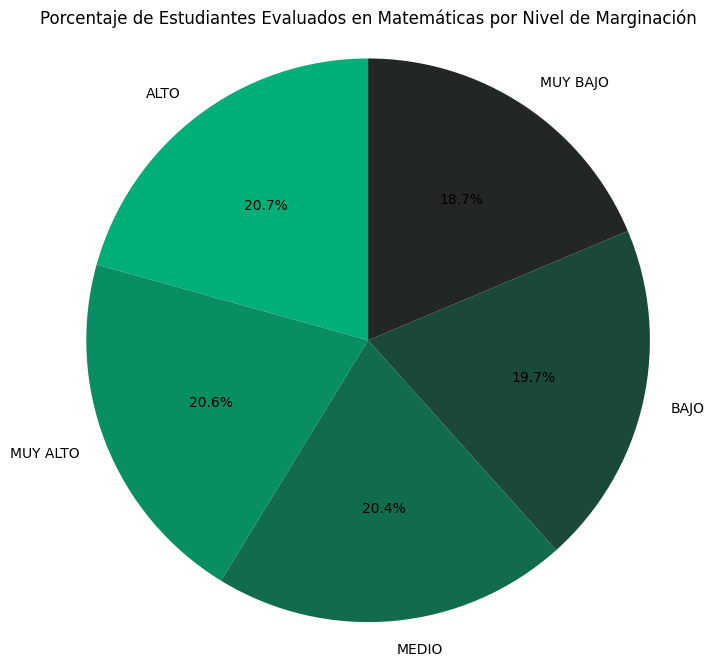

In [231]:

# Agrupar por el nivel de marginación y calcular el promedio de los porcentajes de evaluación en matemáticas
df_marginacion = df.groupby('GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT')['PORCENTAJE DE ALUMNOS EVALUADOS MATEMATICAS'].mean().sort_values(ascending=False)

# Crear paleta de colores personalizada
n_colors = len(df_marginacion)
verde_base = "#00af77"
palette_dark = sns.dark_palette(verde_base, n_colors=n_colors, reverse=True)

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(df_marginacion, labels=df_marginacion.index, autopct='%1.1f%%', startangle=90, colors=palette_dark)
plt.title('Porcentaje de Estudiantes Evaluados en Matemáticas por Nivel de Marginación')
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

j) Del total de estudiantes en cada nivel de marginación, calcula y
grafica la proporción de estudiantes por nivel de logro en cada
una de las 2 áreas de conocimiento

<Figure size 1200x800 with 0 Axes>

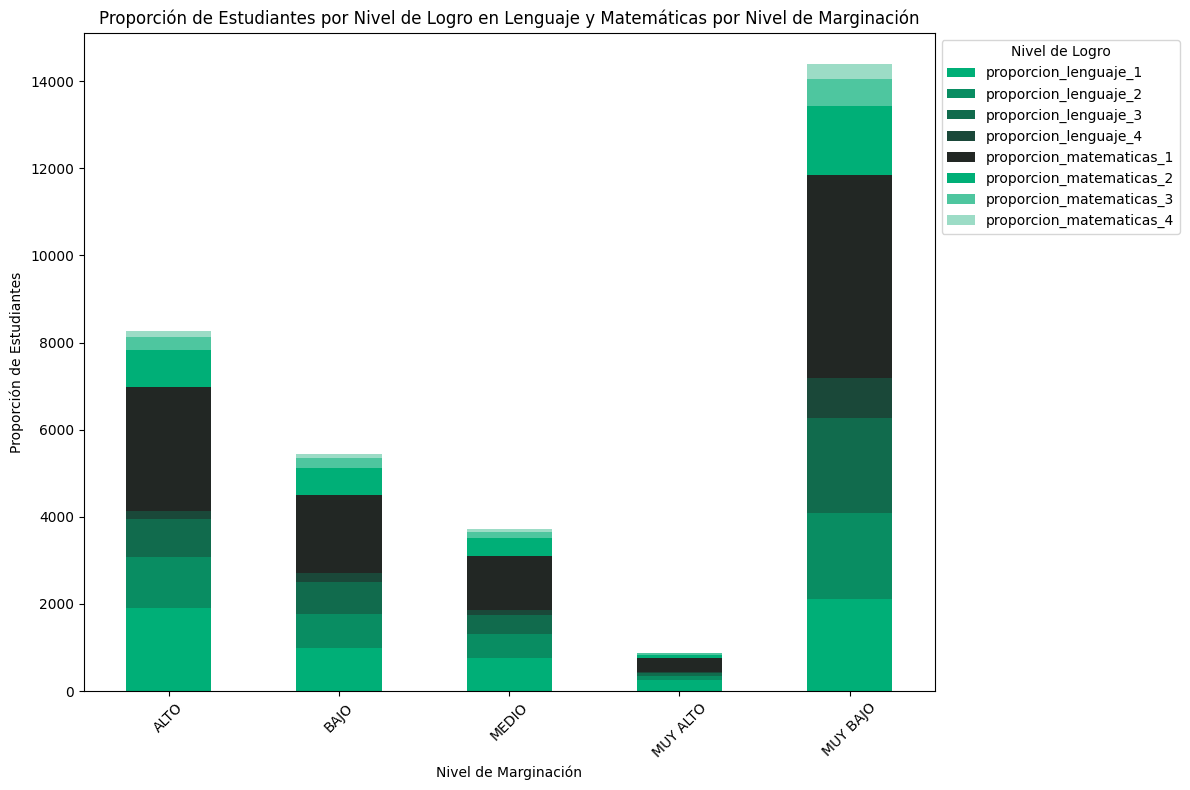

In [232]:



# Crear un DataFrame con las proporciones de los niveles de logro en Lenguaje y Matemáticas
df['total_alumnos'] = df[[
    'NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS',
    'NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS',
    'NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS',
    'NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS'
]].sum(axis=1)

# Rellenar valores NaN con 0 antes de la division.
df['total_alumnos'] = df['total_alumnos'].fillna(0)

# Calcular las proporciones para Lenguaje y Matemáticas en función del total de alumnos
df['proporcion_lenguaje_1'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION I PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)
df['proporcion_lenguaje_2'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION II PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)
df['proporcion_lenguaje_3'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION III PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)
df['proporcion_lenguaje_4'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN LENGUAJE Y COMUNICACION IV PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)

df['proporcion_matematicas_1'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN MATEMATICAS I PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)
df['proporcion_matematicas_2'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN MATEMATICAS II PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)
df['proporcion_matematicas_3'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN MATEMATICAS III PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)
df['proporcion_matematicas_4'] = np.where(df['total_alumnos'] != 0, df['NIVELES DE LOGRO EN MATEMATICAS IV PORCENTAJE ALUMNOS'] / df['total_alumnos'], 0)

# Agrupar por nivel de marginación y calcular la proporción total de estudiantes en cada nivel de logro
df_marginacion = df.groupby('GRADO DE MARGINACIÓN CONAPO DE LA LOCALIDAD DONDE SE UBICA EL CT')[[
    'proporcion_lenguaje_1', 'proporcion_lenguaje_2', 'proporcion_lenguaje_3', 'proporcion_lenguaje_4',
    'proporcion_matematicas_1', 'proporcion_matematicas_2', 'proporcion_matematicas_3', 'proporcion_matematicas_4'
]].sum()

# Graficar las proporciones por nivel de marginación
plt.figure(figsize=(12, 8))

# Crear paleta de colores personalizada
n_colors = 8  # Número de niveles de logro
verde_base = "#00af77"
palette_dark = sns.dark_palette(verde_base, n_colors=n_colors // 2 + 1, reverse=True)
palette_light = sns.light_palette(verde_base, n_colors=n_colors // 2)[::-1]
palette = list(palette_dark) + list(palette_light)

ax = df_marginacion.plot(kind='bar', stacked=True, figsize=(12, 8), color=palette)

plt.title('Proporción de Estudiantes por Nivel de Logro en Lenguaje y Matemáticas por Nivel de Marginación')
plt.xlabel('Nivel de Marginación')
plt.ylabel('Proporción de Estudiantes')
plt.legend(title="Nivel de Logro", loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()